Processing Variables For Modeling
==================

Libraries

In [1]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.preprocessing import scale

# Visualization
import matplotlib.pyplot as plt; plt.style.use("ggplot")
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline
# figure size
rcParams['figure.figsize'] = 11,6

pd.set_option('display.max_columns', None)

Read Data

In [2]:
loans = pd.read_csv("../data/accepted_2007_to_2017Q3.csv.gz").sample(200000, random_state = 4290)

In [3]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1627421,69562380,NaN,22250.0,22250.0,22250.0,60 months,19.89,588.13,E,E3,Human Resource Analyst,6 years,RENT,53000.0,Source Verified,Jan-2016,Current,n,NaN,credit_card,Credit card refinancing,236xx,VA,20.34,0.0,May-1995,670.0,674.0,0.0,61.0,NaN,14.0,0.0,17476.0,61.3,37.0,w,16169.34,16169.34,13502.400000,13502.40,6080.66,7421.74,0.0,0.0,0.0,Dec-2017,588.13,Jan-2018,Dec-2017,694.0,690.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,101817.0,4.0,2.0,2.0,5.0,2.0,84341.0,100.0,4.0,7.0,6375.0,77.0,28500.0,0.0,8.0,0.0,12.0,7832.0,6094.0,68.4,0.0,0.0,126.0,248.0,1.0,1.0,0.0,1.0,61.0,NaN,61.0,1.0,5.0,10.0,5.0,11.0,15.0,12.0,22.0,10.0,14.0,0.0,0.0,0.0,6.0,91.9,60.0,0.0,0.0,113079.0,101817.0,19300.0,84579.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1222587,118241037,NaN,12000.0,12000.0,12000.0,60 months,15.05,285.80,C,C4,Teacher,10+ years,MORTGAGE,106000.0,Not Verified,Sep-2017,Current,n,NaN,debt_consolidation,Debt consolidation,076xx,NJ,14.16,0.0,Dec-1996,670.0,674.0,3.0,NaN,67.0,9.0,1.0,1571.0,8.7,25.0,w,11588.99,11588.99,847.370000,847.37,411.01,436.36,0.0,0.0,0.0,Dec-2017,285.80,Jan-2018,Dec-2017,689.0,685.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,75019.0,1.0,4.0,1.0,4.0,4.0,73448.0,74.0,2.0,3.0,1196.0,53.0,18000.0,3.0,0.0,7.0,7.0,8335.0,6304.0,15.9,0.0,0.0,165.0,249.0,9.0,4.0,2.0,47.0,NaN,1.0,NaN,0.0,1.0,2.0,1.0,3.0,13.0,5.0,10.0,2.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,101997.0,75019.0,7500.0,83997.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,

In [4]:
loans.shape

(200000, 150)

### 01 - Processing Target: Loan Status

`loan_status` is the current status of the loan. This is the variable we want to predict in our machine learning model. For this variable, we are going to considerar three labels:
- 0: loans that have already been paid.
- 1: default or charged off loans.
- 2: current loans (rest of the cases), where we don't know if they are going to be paid or not.

We will use labels 0 and 1 for training and testing our model. Label 2 is going to use just for predicting.

In [5]:
loans['loan_status'].value_counts()

Current                                                95709
Fully Paid                                             78905
Charged Off                                            20244
Late (31-120 days)                                      2845
In Grace Period                                         1247
Late (16-30 days)                                        717
Does not meet the credit policy. Status:Fully Paid       233
Does not meet the credit policy. Status:Charged Off       92
Default                                                    7
Name: loan_status, dtype: int64

In [6]:
loans = loans[(loans['loan_status'] == "Fully Paid") | \
              (loans['loan_status'] == "Charged Off")]

In [7]:
loans.shape

(99149, 150)

In [8]:
loan_status_dict = {'Fully Paid': 0,
                    'Charged Off': 1}

In [9]:
loans['loan_status'] = loans['loan_status'].map(lambda i: loan_status_dict[i])

In [10]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
759829,107509404,NaN,20000.0,20000.0,20000.0,36 months,10.49,649.96,B,B2,Supervisor- Control Center,10+ years,MORTGAGE,87000.0,Verified,May-2017,0,n,NaN,debt_consolidation,Debt consolidation,800xx,CO,22.21,0.0,Oct-1993,690.0,694.0,0.0,30.0,NaN,16.0,0.0,25241.0,41.0,29.0,w,0.0,0.0,20780.163304,20780.16,20000.00,780.16,0.0,0.0,0.0,Sep-2017,18824.45,NaN,Oct-2017,724.0,720.0,0.0,37.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,198620.0,1.0,2.0,1.0,2.0,7.0,21564.0,74.0,3.0,6.0,8065.0,41.0,61700.0,0.0,0.0,3.0,8.0,12413.0,5310.0,45.0,0.0,0.0,120.0,282.0,4.0,4.0,2.0,10.0,30.0,8.0,30.0,1.0,10.0,13.0,10.0,12.0,5.0,13.0,21.0,6.0,16.0,NaN,0.0,0.0,4.0,76.0,10.0,0.0,0.0,270019.0,46805.0,53100.0,29047.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
125402,20228030,NaN,35000.0,35000.0,35000.0,60 months,18.24,893.35,D,D5,Section Manager,10+ years,MORTGAGE,93660.0,Verified,Jul-2014,1,n,NaN,debt_consolidation,Debt consolidation,187xx,PA,23.00,0.0,Feb-1993,685.0,689.0,1.0,NaN,NaN,15.0,0.0,48500.0,77.2,32.0,w,0.0,0.0,25973.360000,25973.36,13046.74,12926.62,0.0,0.0,0.0,Dec-2016,893.35,NaN,Oct-2017,529.0,525.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,161971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62800.0,NaN,NaN,NaN,3.0,10798.0,7168.0,83.2,0.0,0.0,256.0,168.0,5.0,5.0,4.0,42.0,NaN,2.0,NaN,0.0,6.0,10.0,6.0,7.0,10.0,11.0,18.0,10.0,15.0,0.0,0.0,0.0,2.0,100.0,83.3,0.0,0.0,196755.0,70845.0,42600.0,36606.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [11]:
loans['loan_status'].dtypes

dtype('int64')

In [12]:
loans['loan_status'].describe()

count    99149.000000
mean         0.204178
std          0.403101
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

__Our prior value of un paid loans is about 20%__ We will keep this value in mind!

### 02 - Cleaning Data

#### 02.1 - Removing columns with 25% of NA's

There are some features with blank values instead of NA. Let's change them:

In [13]:
loans[loans == ""] = np.nan

Number of NA's per column:

In [14]:
na_percentage = loans.isnull().sum()/loans.shape[0]

Keep columns with, at least, 75% of values:

In [15]:
loans = loans.loc[:,na_percentage < 0.25]

In [17]:
loans.isnull().sum()

id                                0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      5888
emp_length                     5088
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
title                           961
zip_code                          0
addr_state                        0
dti                               6
delinq_2yrs                       0
earliest_cr_line                  0
fico_range_low                    0
fico_range_high                   0
inq_last_6mths                    0
open_acc                    

There are still some NA's values we have to deal with. We will do it later.

#### 02.2 - Removing features with just one value

In [18]:
number_of_unique_values_per_column = loans.apply(lambda i: i.nunique(), axis = 0)

In [19]:
loans = loans.loc[:,number_of_unique_values_per_column != 1]

In [20]:
loans.shape

(99149, 87)

### 03 - Processing Features

#### 03.1 - Removing non available Variables for new users:

In this section, we are going to use the data dictionary that lending club provides at their webpage. This way, we will get only the description of the features in our current loans dataset. 

To decide whether keep a feature or not is one of the most critical parts of the project since we have some information in the dataset related to time or previous payments that we will not have for new borrowers and they reveal much information about loan status. For example, if `debt_settlement_flag` is "Y", it implies that the borrower charged off, or if `total_pymnt` is greater than `loan_amnt`, then the loan must be paid. For this reason, only variables that don't update over time will be kept. __We can't use this kind of information for new lending club users.__

In [21]:
lc_dict = pd.read_excel("C:/Users/NB24125/Documents/loan-data-analysis/data/LCDataDictionary.xlsx")

In [22]:
lc_dict.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [23]:
features_intersection = pd.DataFrame(list(set(lc_dict['LoanStatNew']).intersection(set(loans.columns))))
features_intersection.columns = ["LoanStatNew"]

In [24]:
features_dict = pd.merge(features_intersection, lc_dict, on=['LoanStatNew'])

In [25]:
features_dict

,LoanStatNew,Description
0,num_actv_bc_tl,Number of currently active bankcard accounts
1,num_accts_ever_120_pd,Number of accounts ever 120 or more days past due
2,total_acc,The total number of credit lines currently in ...
3,installment,The monthly payment owed by the borrower if th...
4,collections_12_mths_ex_med,Number of collections in 12 months excluding m...
5,purpose,A category provided by the borrower for the lo...
6,pct_tl_nvr_dlq,Percent of trades never delinquent
7,num_rev_tl_bal_gt_0,Number of revolving trades with balance >0
8,total_rec_prncp,Principal received to date
9,bc_util,Ratio of total current balance to high credit/...


Variables to keep:

In [26]:
columns_of_interest = ['num_bc_sats', 'num_rev_tl_bal_gt_0', 'grade', 'avg_cur_bal', 'pub_rec_bankruptcies', 
                       'num_rev_accts', 'tax_liens', 'funded_amnt_inv', 'delinq_2yrs', 'total_bal_ex_mort',
                       'pct_tl_nvr_dlq', 'disbursement_method', 'fico_range_low', 'verification_status', 'delinq_amnt',
                       'purpose', 'emp_title', 'zip_code', 'loan_amnt', 'installment', 
                       'fico_range_high', 'annual_inc', 'term', 'int_rate', 'emp_length',
                       'revol_bal', 'application_type', 'num_bc_tl', 'num_sats', 'tot_hi_cred_lim', 
                       'debt_settlement_flag', 'tot_coll_amt', 'initial_list_status', 'bc_open_to_buy', 'total_bc_limit', 
                       'open_acc', 'revol_util', 'pub_rec', 'funded_amnt', 'num_il_tl', 
                       'addr_state', 'num_accts_ever_120_pd', 'total_il_high_credit_limit', 'bc_util', 'percent_bc_gt_75', 
                       'sub_grade', 'mort_acc', 'num_op_rev_tl', 'dti', 'home_ownership',
                       'loan_status']

In [27]:
loans = loans[sorted(columns_of_interest)]

In [28]:
loans.head()

,addr_state,annual_inc,application_type,avg_cur_bal,bc_open_to_buy,bc_util,debt_settlement_flag,delinq_2yrs,delinq_amnt,disbursement_method,dti,emp_length,emp_title,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,grade,home_ownership,initial_list_status,installment,int_rate,loan_amnt,loan_status,mort_acc,num_accts_ever_120_pd,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,open_acc,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,tax_liens,term,tot_coll_amt,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,verification_status,zip_code
759829,CO,87000.0,Individual,12413.0,5310.0,45.0,N,0.0,0.0,Cash,22.21,10+ years,Supervisor- Control Center,694.0,690.0,20000.0,20000.0,B,MORTGAGE,w,649.96,10.49,20000.0,0,2.0,1.0,10.0,12.0,5.0,13.0,21.0,6.0,16.0,16.0,76.0,10.0,0.0,0.0,debt_consolidation,25241.0,41.0,B2,0.0,36 months,0.0,270019.0,46805.0,53100.0,29047.0,Verified,800xx
125402,PA,93660.0,Individual,10798.0,7168.0,83.2,N,0.0,0.0,Cash,23.00,10+ years,Section Manager,689.0,685.0,35000.0,35000.0,D,MORTGAGE,w,893.35,18.24,35000.0,1,4.0,0.0,6.0,7.0,10.0,11.0,18.0,10.0,15.0,15.0,100.0,83.3,0.0,0.0,debt_consolidation,48500.0,77.2,D5,0.0,60 months,0.0,196755.0,70845.0,42600.0,36606.0,Verified,187xx
542244,IL,70000.0,Individual,4945.0,42506.0,39.9,N,0.0,0.0,Cash,20.59,8 years,Lead Service Technician,714.0,710.0,15000.0,15000.0,C,RENT,w,338.93,12.69,15000.0,0,0.0,0.0,9.0,10.0,5.0,9.0,10.0,6.0,11.0,11.0,100.0,28.6,0.0,0.0,credit_card,28194.0,39.9,C2,0.0,60 months,0.0,107207.0,44504.0,70700.0,36507.0,Source Verified,601xx
817252,CA,86000.0,Individual,15413.0,3437.0,80.6,N,2.0,0.0,Cash,28.13,6 years,Correctional Officer,679.0,675.0,18225.0,18225.0,D,MORTGAGE,f,663.92,18.55,18225.0,0,1.0,0.0,6.0,6.0,8.0,13.0,19.0,9.0,18.0,18.0,92.9,50.0,0.0,0.0,other,20718.0,60.9,D2,0.0,36 months,0.0,334811.0,53889.0,17700.0,80429.0,Source Verified,939xx
382084,CA,60000.0,Individual,1982.0,14989.0,35.1,N,0.0,0.0,Cash,19.14,1 year,Human Resources Manager,669.0,665.0,12000.0,12000.0,F,MORTGAGE,f,331.36,21.99,12000.0,1,3.0,1.0,10.0,16.0,9.0,20.0,32.0,11.0,22.0,22.0,97.3,10.0,1.0,1.0,credit_card,11569.0,26.5,F1,0.0,60 months,0.0,80809.0,41629.0,23100.0,37109.0,Verified,933xx


In [29]:
loans.shape

(99149, 51)

#### 03.2 - Numeric Features

In [30]:
loans.dtypes

addr_state                     object
annual_inc                    float64
application_type               object
avg_cur_bal                   float64
bc_open_to_buy                float64
bc_util                       float64
debt_settlement_flag           object
delinq_2yrs                   float64
delinq_amnt                   float64
disbursement_method            object
dti                           float64
emp_length                     object
emp_title                      object
fico_range_high               float64
fico_range_low                float64
funded_amnt                   float64
funded_amnt_inv               float64
grade                          object
home_ownership                 object
initial_list_status            object
installment                   float64
int_rate                      float64
loan_amnt                     float64
loan_status                     int64
mort_acc                      float64
num_accts_ever_120_pd         float64
num_bc_sats 

In [31]:
numeric_variables = loans._get_numeric_data().columns

#### 03.2.1 - Filling NA's to the median for each feature

In [32]:
loans[numeric_variables].isnull().sum()

annual_inc                       0
avg_cur_bal                   8248
bc_open_to_buy                6724
bc_util                       6791
delinq_2yrs                      0
delinq_amnt                      0
dti                              6
fico_range_high                  0
fico_range_low                   0
funded_amnt                      0
funded_amnt_inv                  0
installment                      0
int_rate                         0
loan_amnt                        0
loan_status                      0
mort_acc                      5794
num_accts_ever_120_pd         8248
num_bc_sats                   6846
num_bc_tl                     8248
num_il_tl                     8248
num_op_rev_tl                 8248
num_rev_accts                 8249
num_rev_tl_bal_gt_0           8248
num_sats                      6846
open_acc                         0
pct_tl_nvr_dlq                8268
percent_bc_gt_75              6750
pub_rec                          0
pub_rec_bankruptcies

In [33]:
loans[numeric_variables] = loans[numeric_variables].apply(lambda i: i.fillna(i.median()), axis = 1)

In [34]:
loans[numeric_variables].isnull().sum()

annual_inc                    0
avg_cur_bal                   0
bc_open_to_buy                0
bc_util                       0
delinq_2yrs                   0
delinq_amnt                   0
dti                           0
fico_range_high               0
fico_range_low                0
funded_amnt                   0
funded_amnt_inv               0
installment                   0
int_rate                      0
loan_amnt                     0
loan_status                   0
mort_acc                      0
num_accts_ever_120_pd         0
num_bc_sats                   0
num_bc_tl                     0
num_il_tl                     0
num_op_rev_tl                 0
num_rev_accts                 0
num_rev_tl_bal_gt_0           0
num_sats                      0
open_acc                      0
pct_tl_nvr_dlq                0
percent_bc_gt_75              0
pub_rec                       0
pub_rec_bankruptcies          0
revol_bal                     0
revol_util                    0
tax_lien

Done!

#### 03.2.2 - Dealing with outliers

Let's check the distribution of the numeric features and their relationship with the target:

In [35]:
def numerical_variables_by_target_plot(numeric_variable):
    plt.figure(figsize=(16, 10))
    
    # Distrution of the variable
    plt.subplot(221)
    g=sns.kdeplot(loans[numeric_variable][(loans["loan_status"] == 0)], color="Red", shade = True)
    g=sns.kdeplot(loans[numeric_variable][(loans["loan_status"] == 1)], color="Blue", shade = True)
    
    g.set_xlabel(numeric_variable, fontsize=10)
    g.set_title("Distribution", fontsize=12)
    g.legend(["Fully Paid","Charged Off"])
    #plt.show()
    
    # boxplot
    plt.subplot(222)
    g = sns.boxplot(x = "loan_status", y = numeric_variable, 
                data=loans, notch = True) # notch for showing 95% confidence interval (median)

    g.set_ylabel(numeric_variable, fontsize=10)
    g.set_title("Loan Amount boxplot", fontsize=12)
    plt.show()

annual_inc


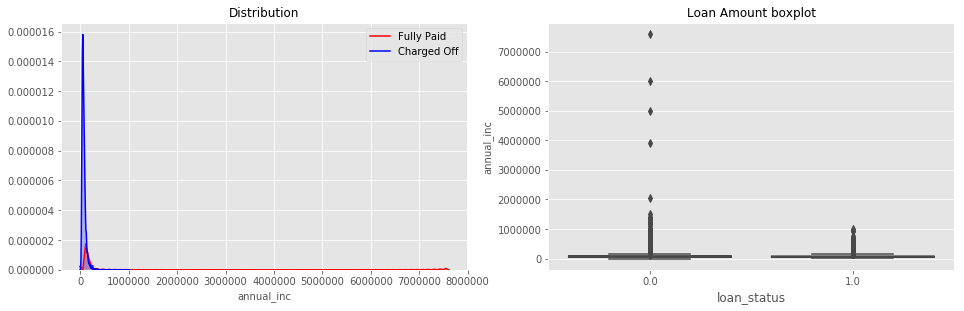

avg_cur_bal


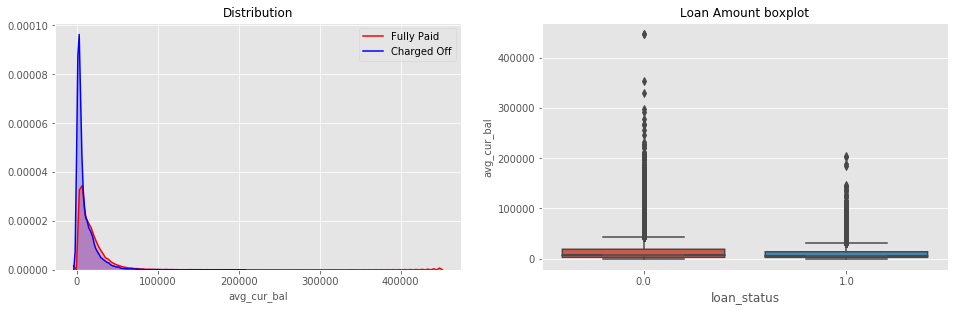

bc_open_to_buy


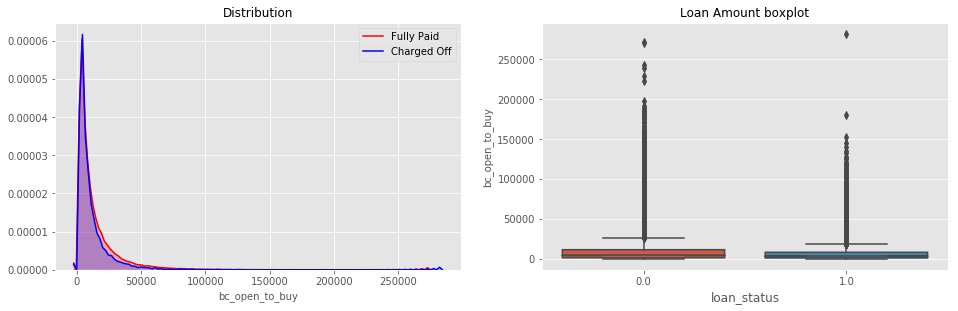

bc_util


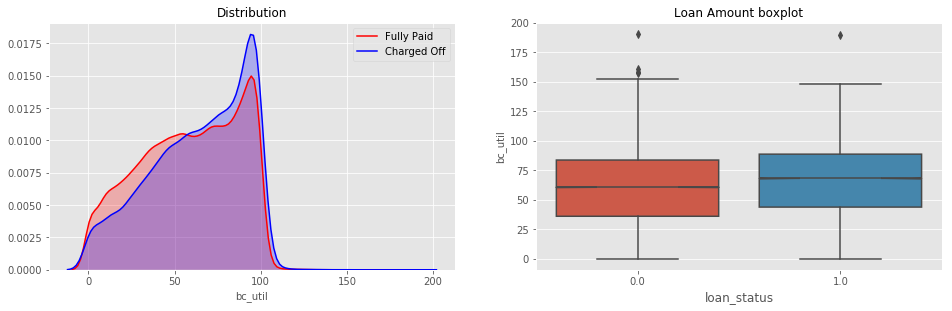

delinq_2yrs


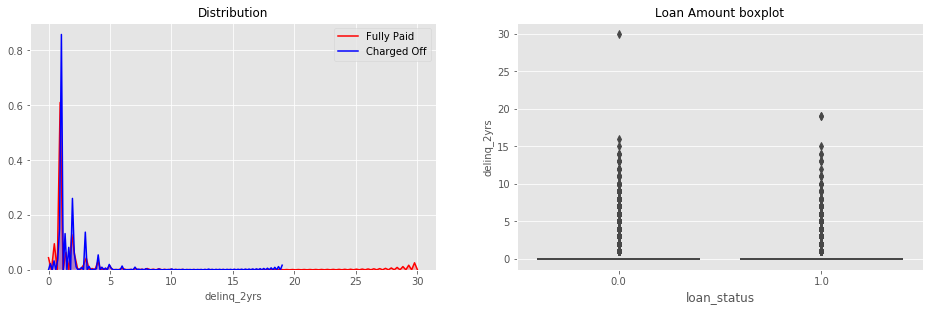

delinq_amnt


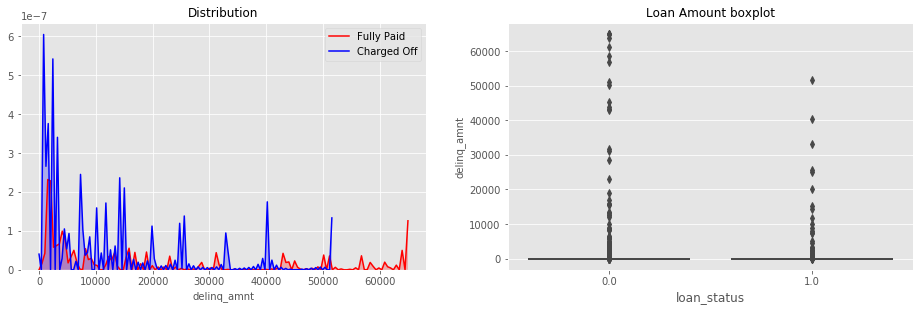

dti


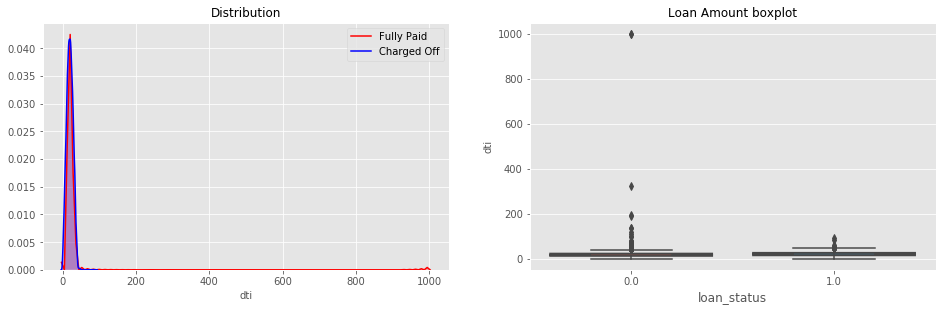

fico_range_high


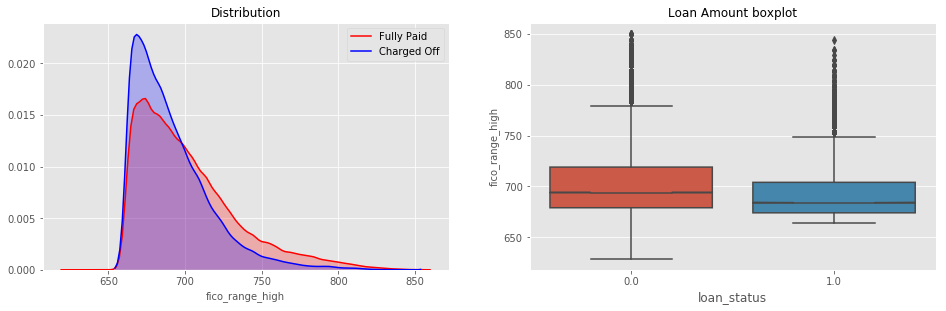

fico_range_low


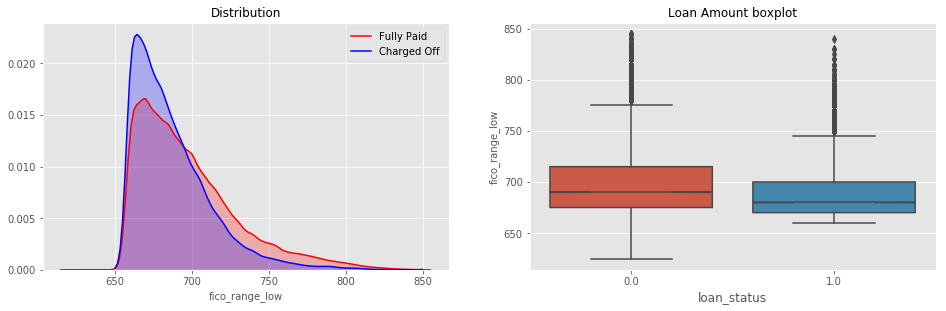

funded_amnt


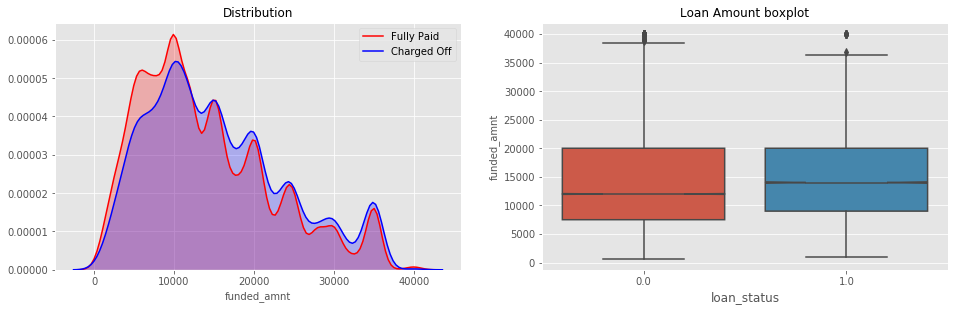

funded_amnt_inv


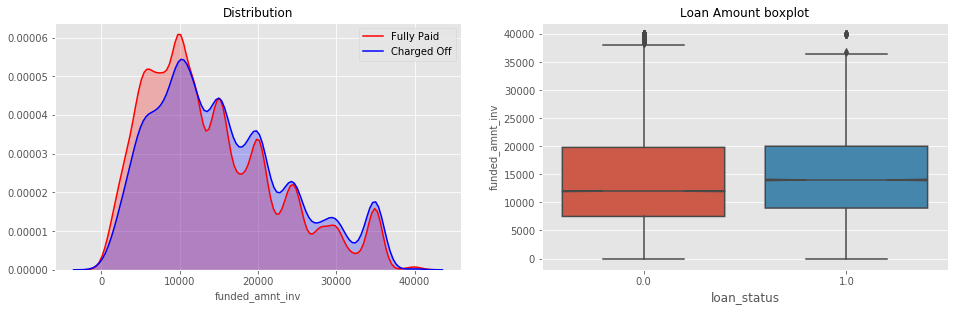

installment


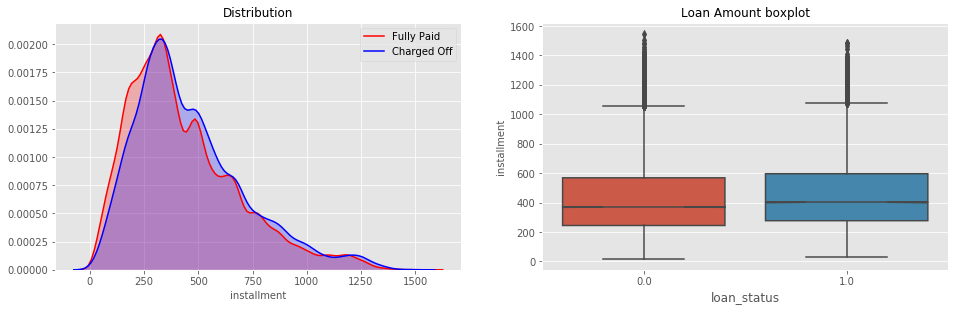

int_rate


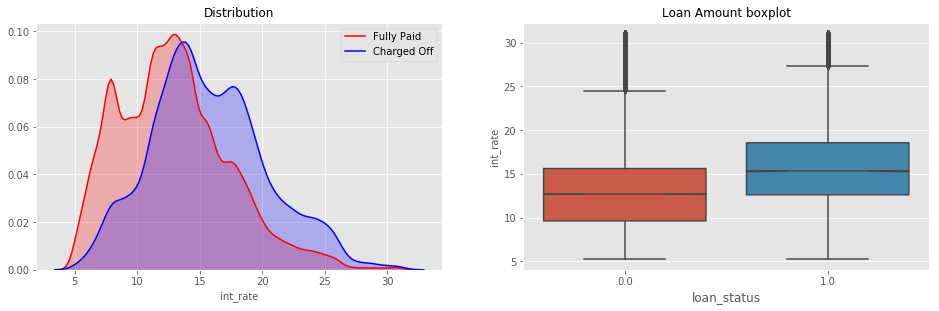

loan_amnt


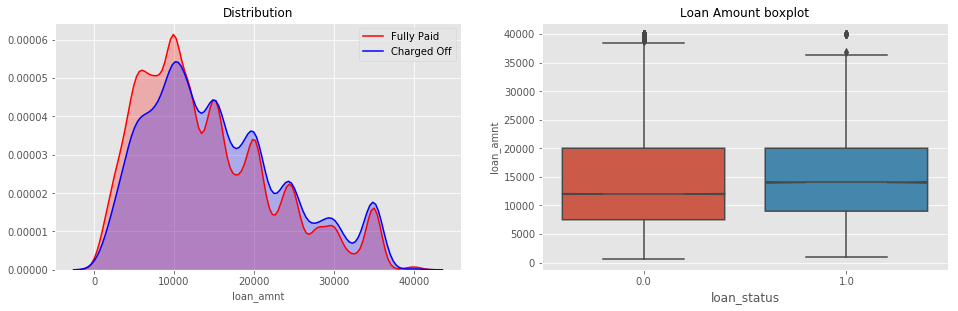

loan_status


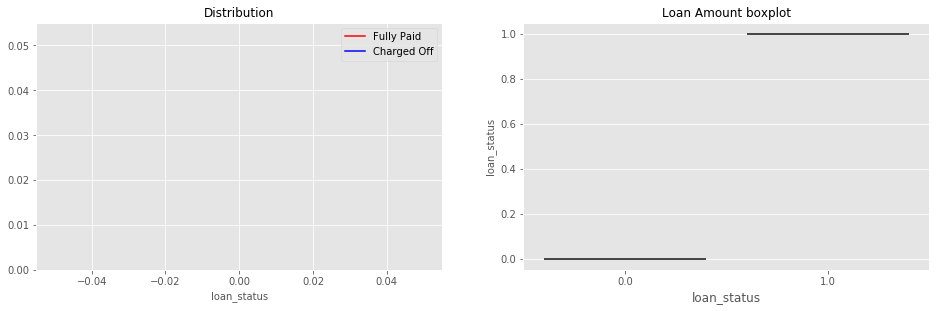

mort_acc


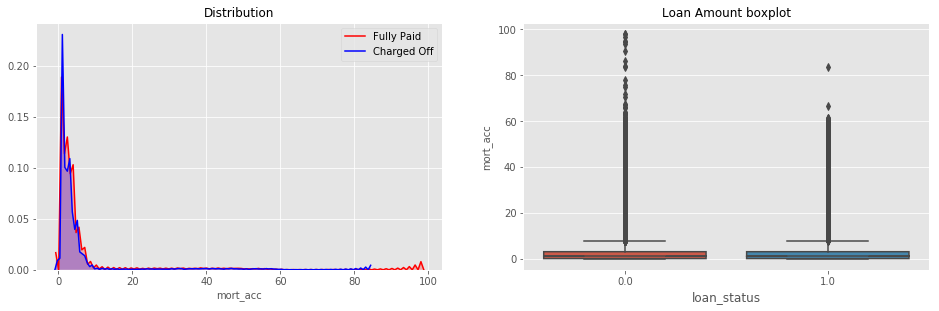

num_accts_ever_120_pd


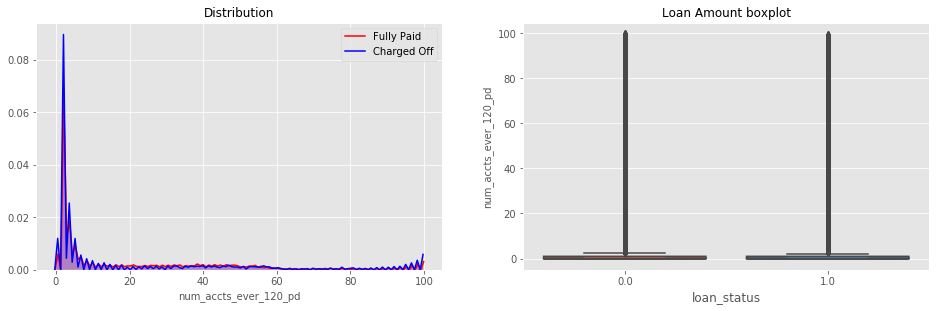

num_bc_sats


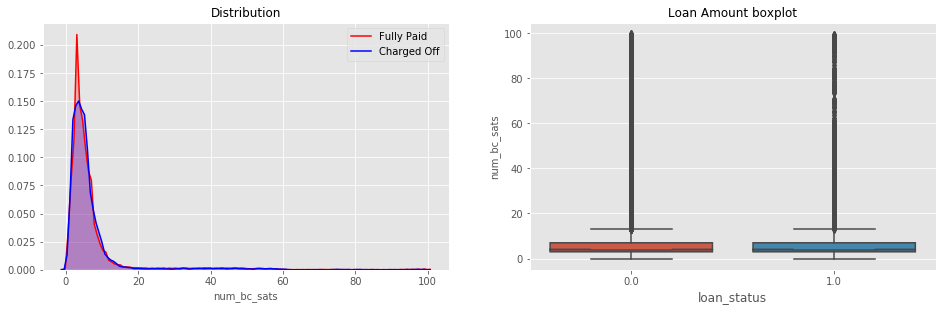

num_bc_tl


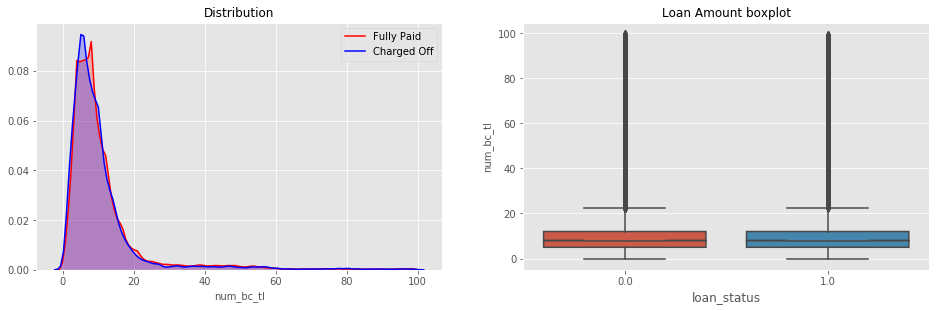

num_il_tl


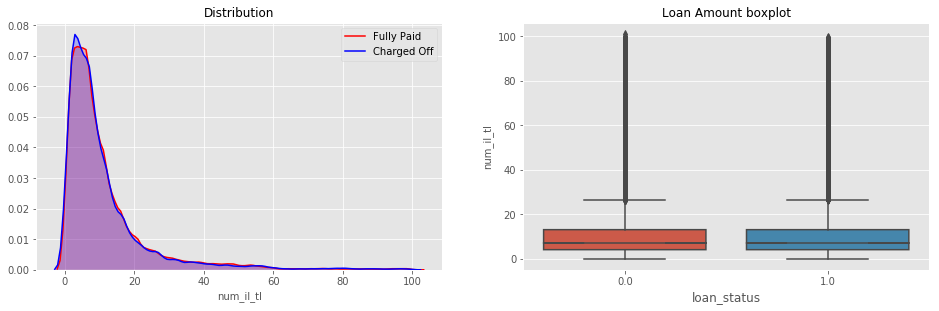

num_op_rev_tl


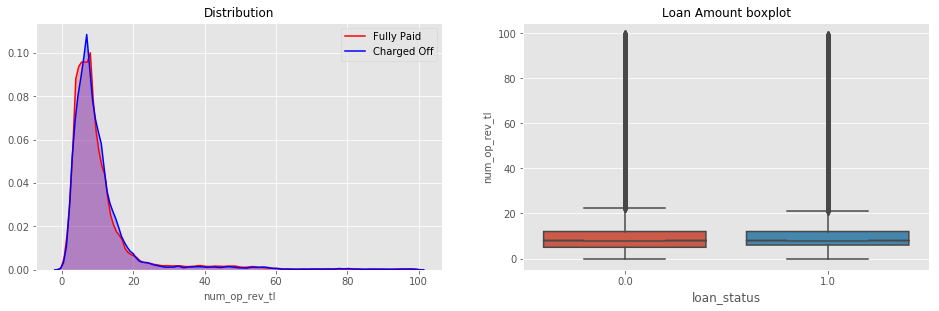

num_rev_accts


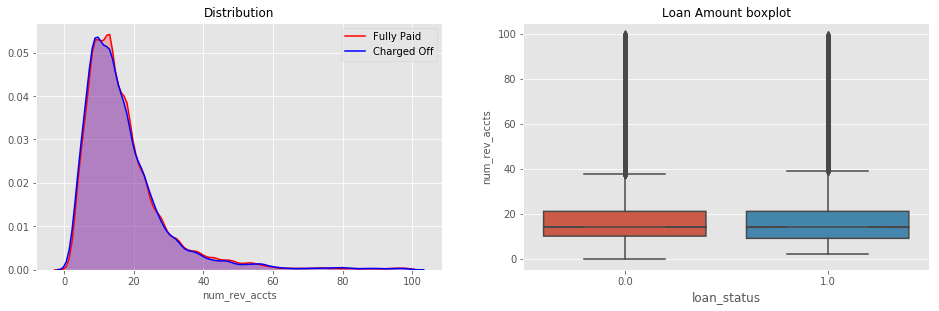

num_rev_tl_bal_gt_0


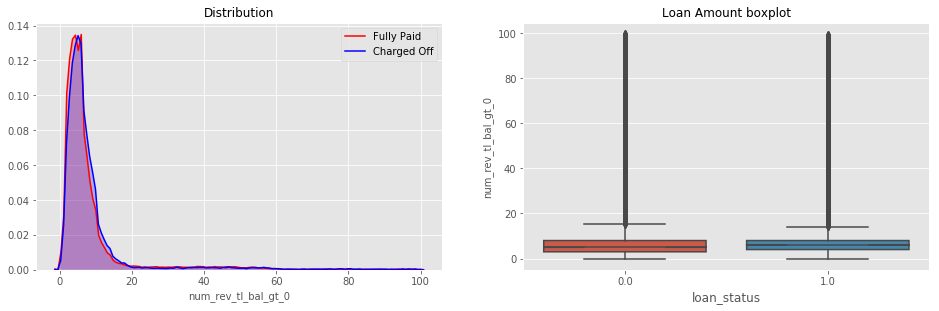

num_sats


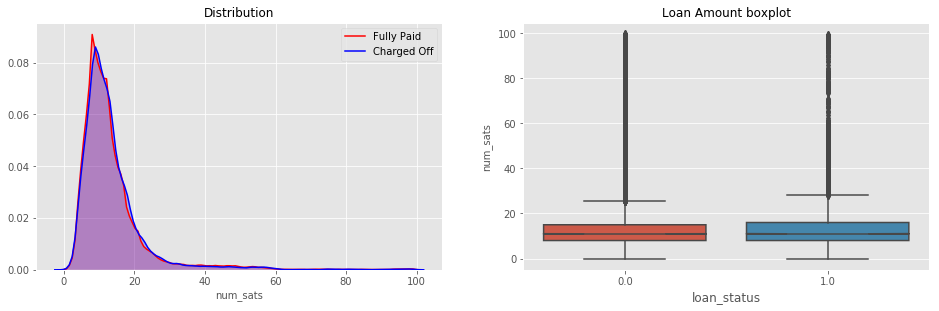

open_acc


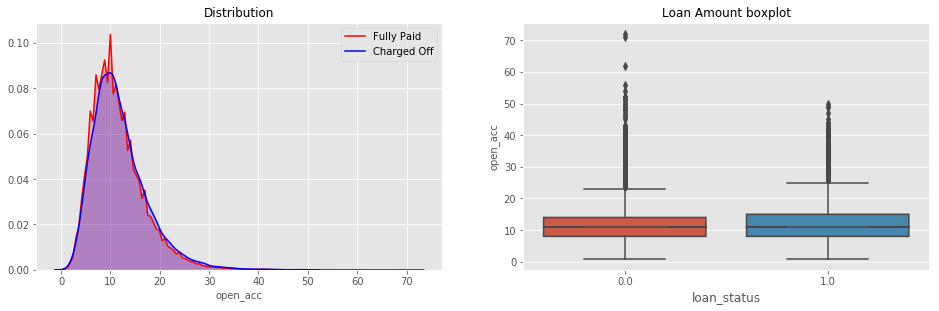

pct_tl_nvr_dlq


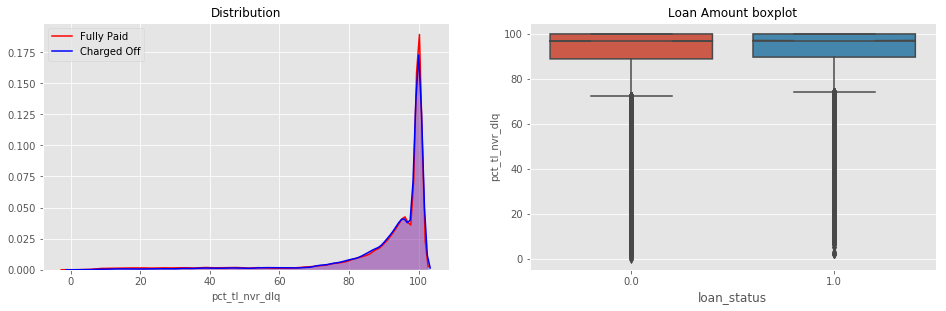

percent_bc_gt_75


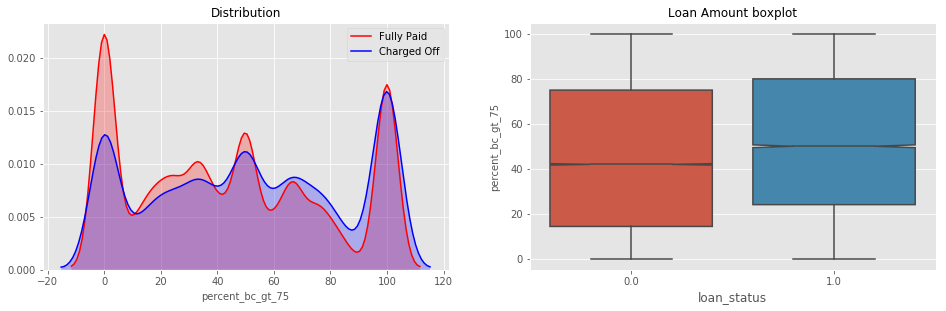

pub_rec


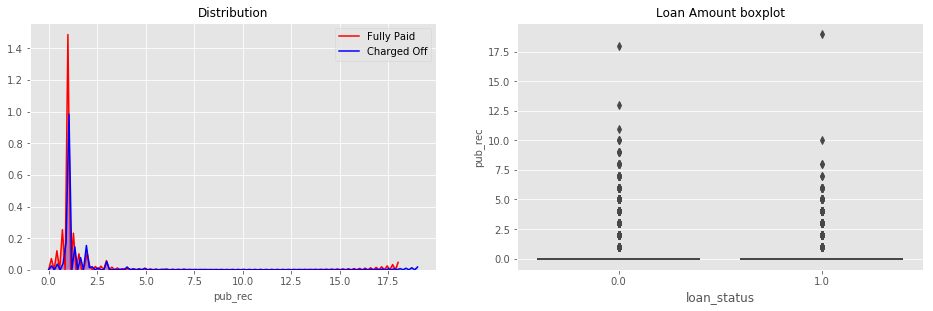

pub_rec_bankruptcies


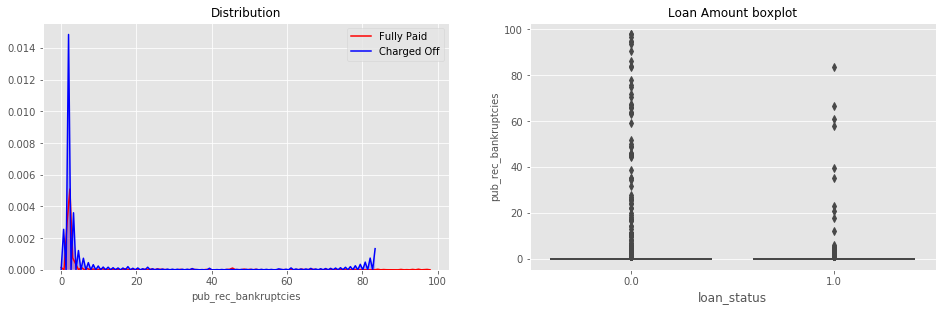

revol_bal


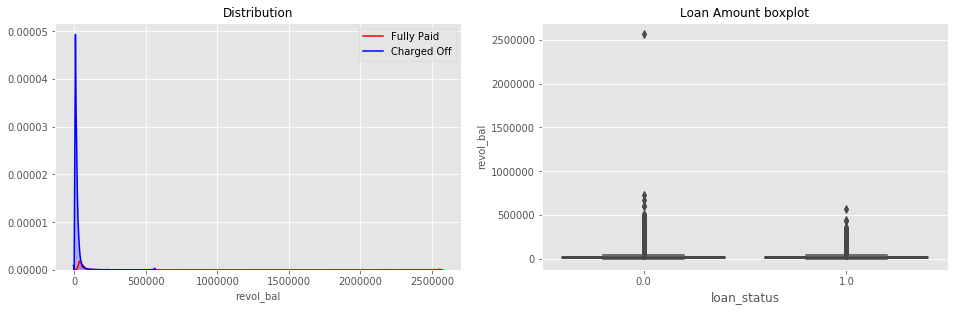

revol_util


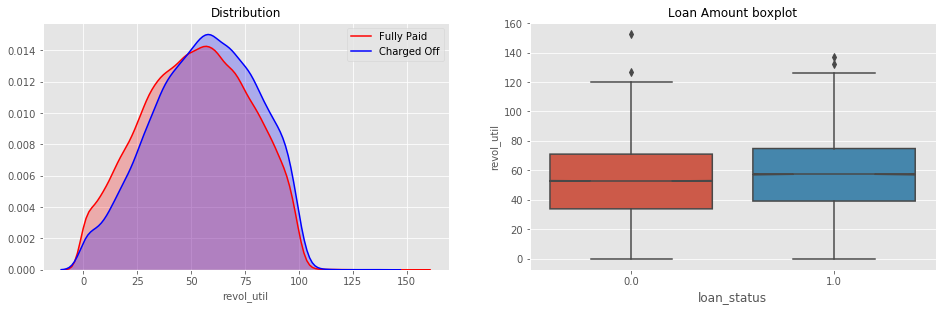

tax_liens


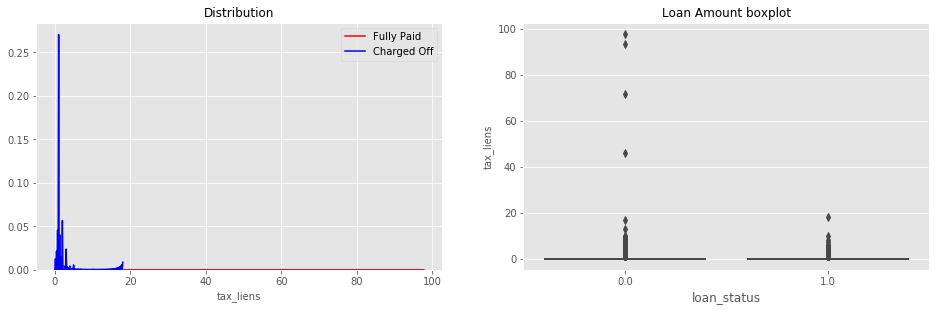

tot_coll_amt


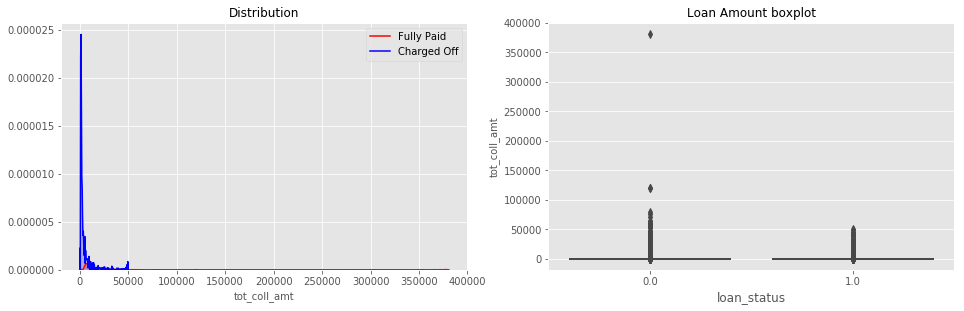

tot_hi_cred_lim


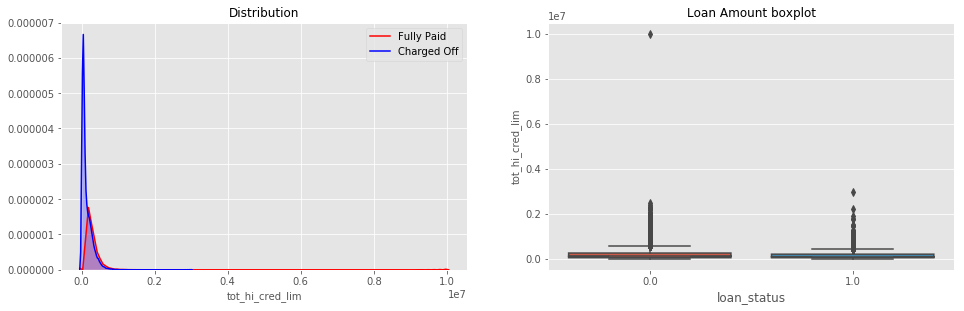

total_bal_ex_mort


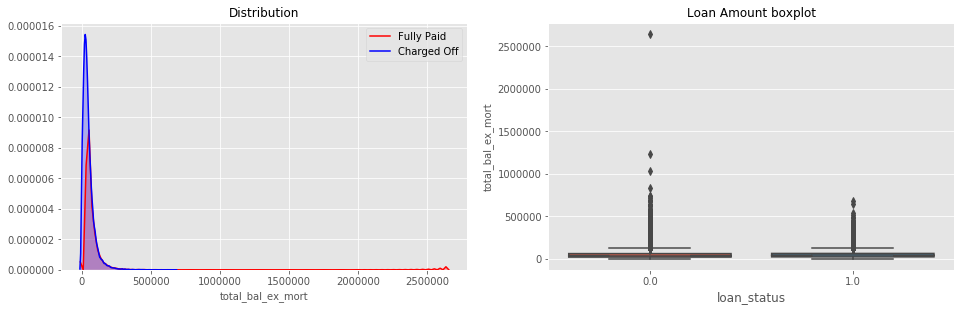

total_bc_limit


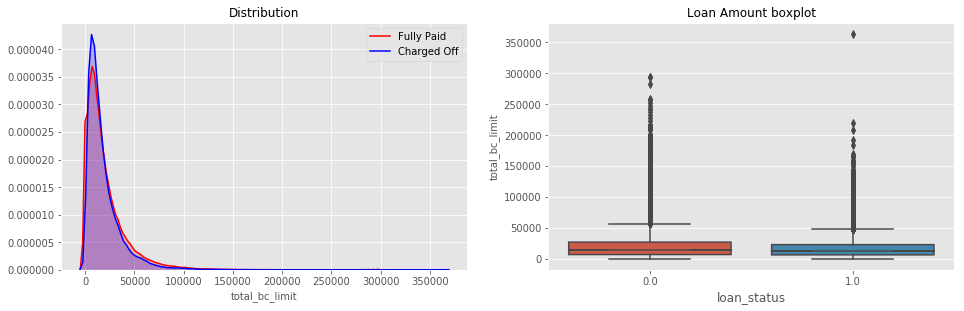

total_il_high_credit_limit


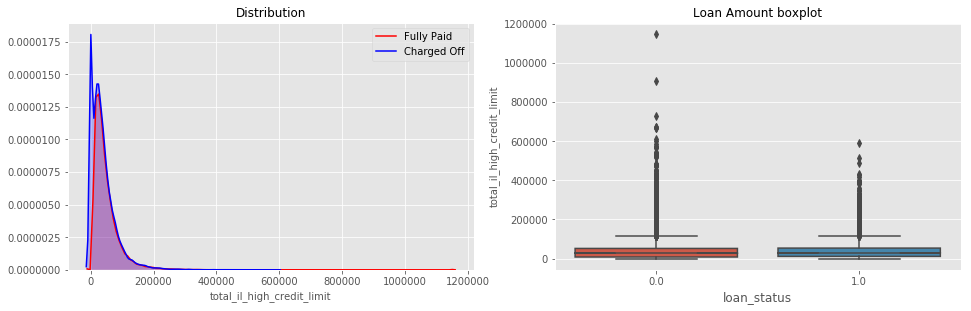

In [36]:
for variable in numeric_variables:
    print(variable)
    numerical_variables_by_target_plot(variable)


Let's remove those observations with a __z_score__ value of two or more in one numeric variable:

In [37]:
def reject_outliers(data, numeric_features, z_score = 2):
    
    outliers_indexes = []
    
    for col in numeric_features:
        outliers_from_col = data[scale(data[col]) > z_score].index
        
        outliers_indexes.extend(outliers_from_col)
    
    indexes_to_remove = list(set(outliers_indexes))
    indexes_to_remove_mask = data.index.isin(indexes_to_remove)
    result = data[~indexes_to_remove_mask]
    
    return result

In [38]:
loans = reject_outliers(loans, numeric_variables)

In [39]:
loans.shape

(57861, 51)

Let's plot numeric features again in order to see the difference without outliers:

annual_inc


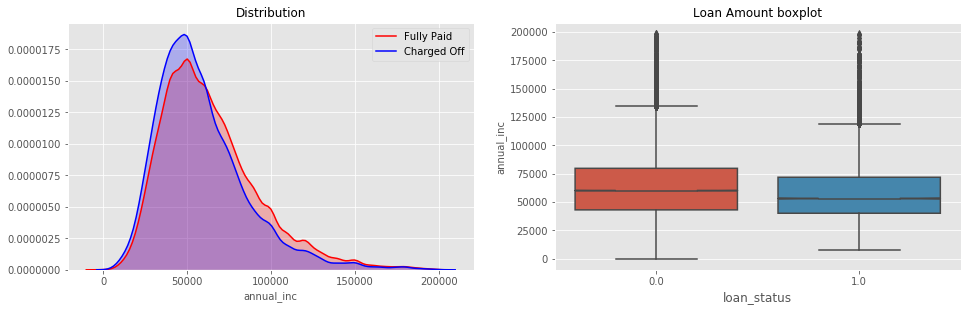

avg_cur_bal


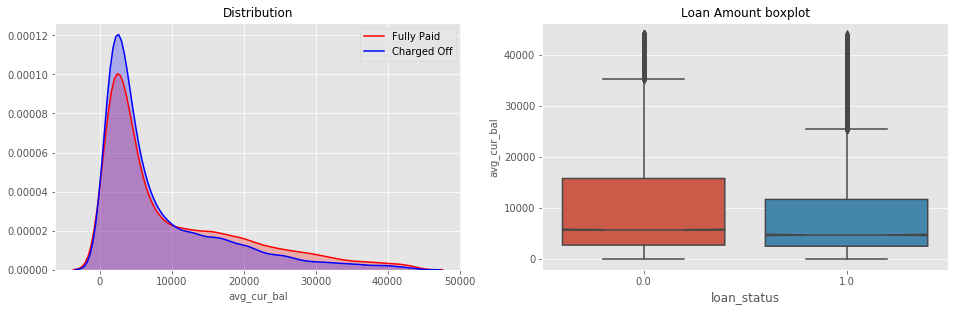

bc_open_to_buy


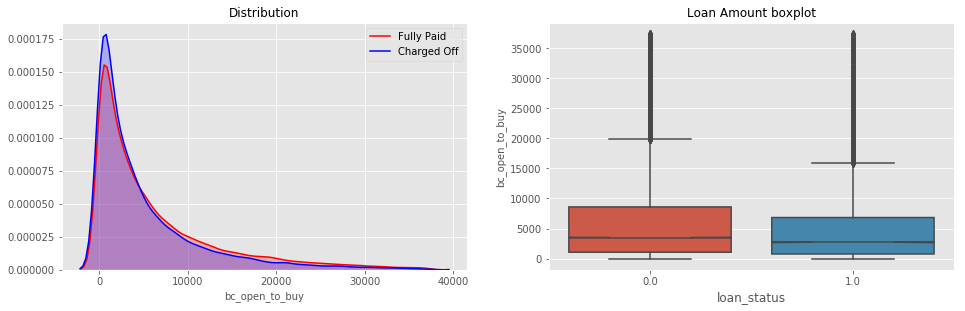

bc_util


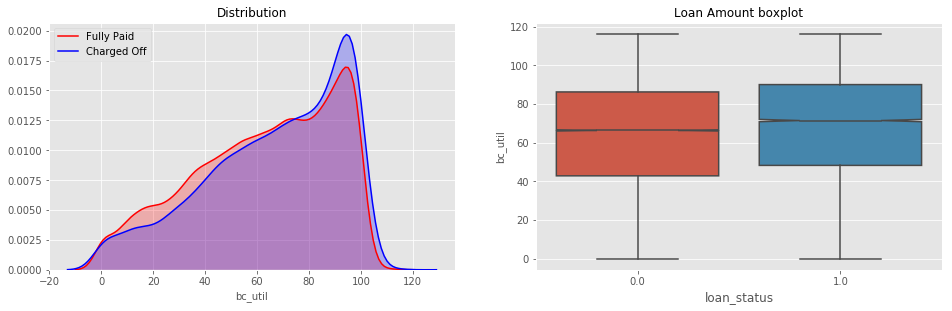

delinq_2yrs


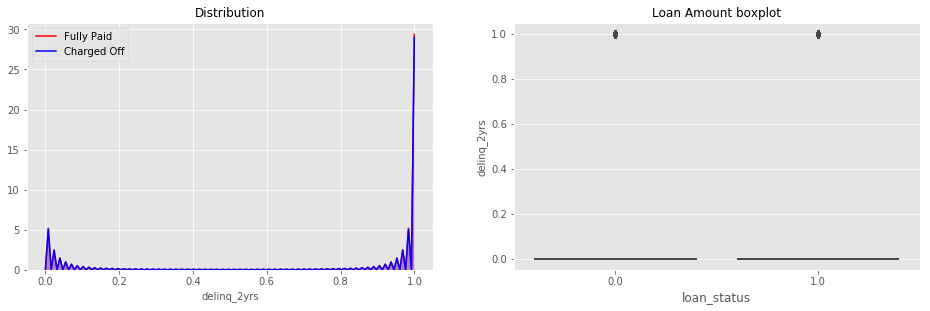

delinq_amnt


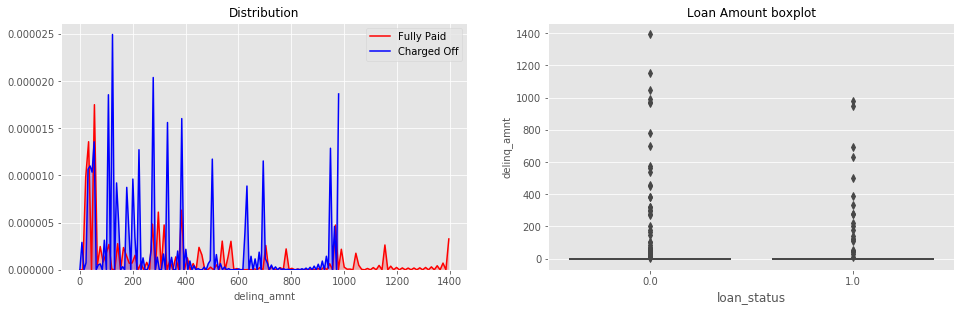

dti


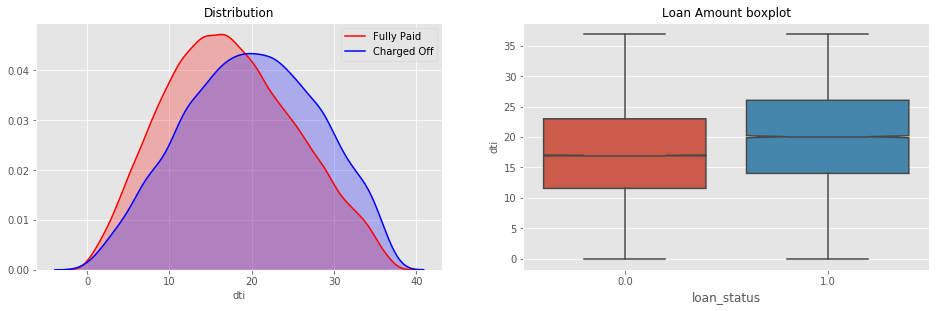

fico_range_high


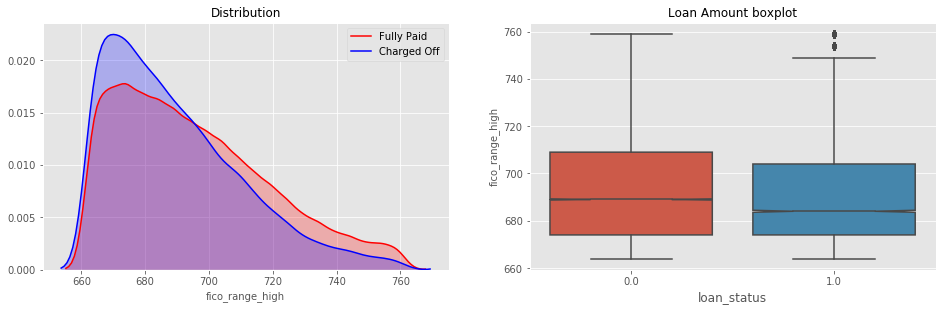

fico_range_low


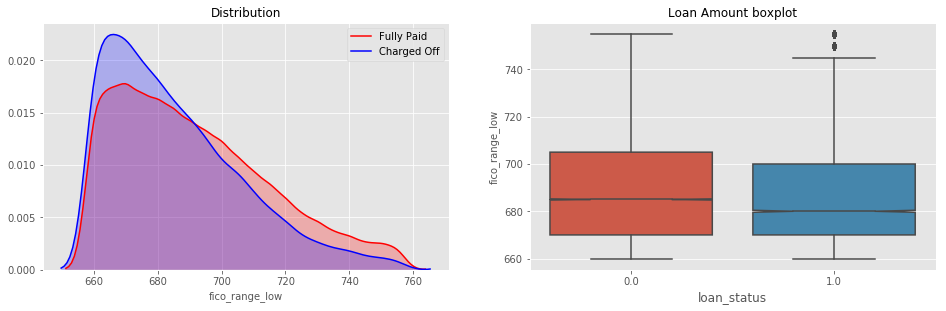

funded_amnt


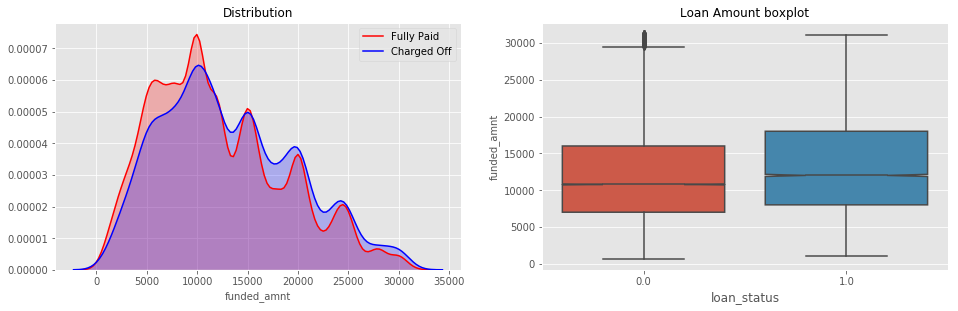

funded_amnt_inv


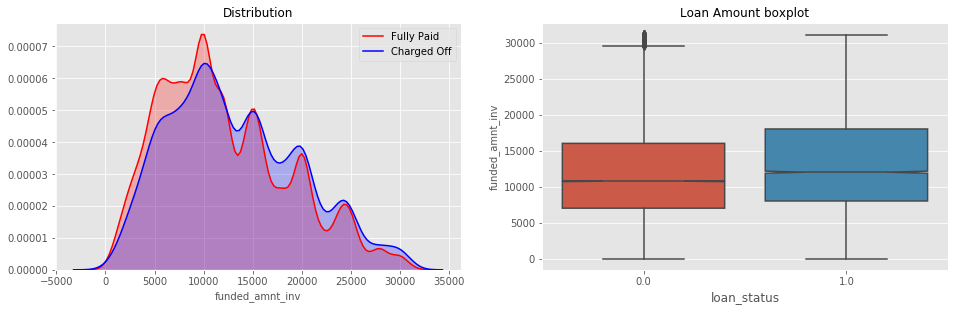

installment


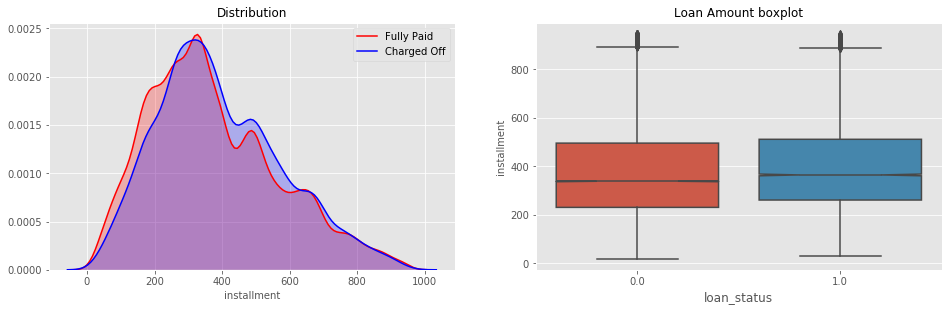

int_rate


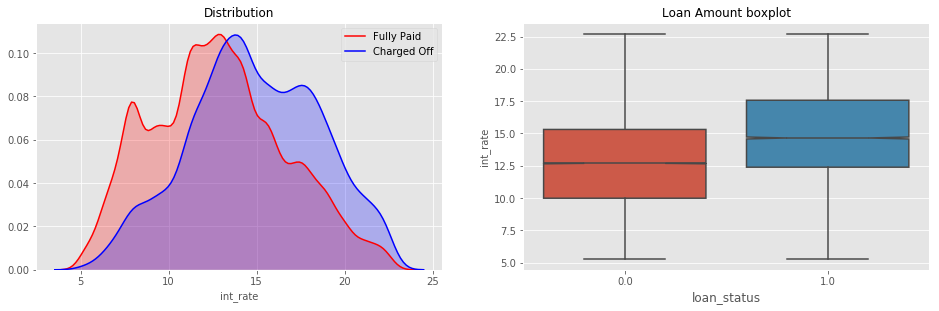

loan_amnt


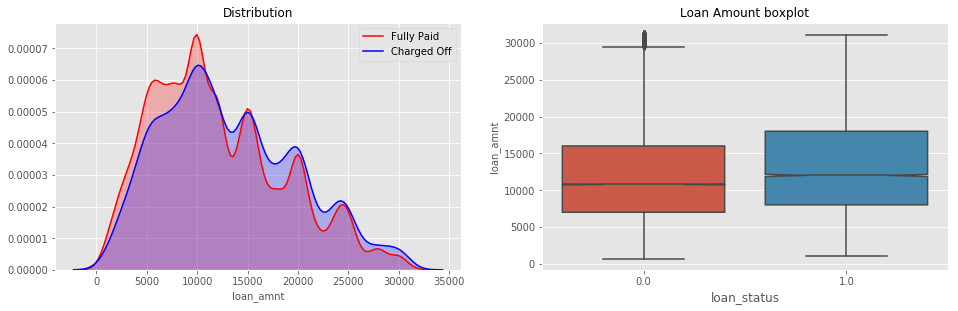

loan_status


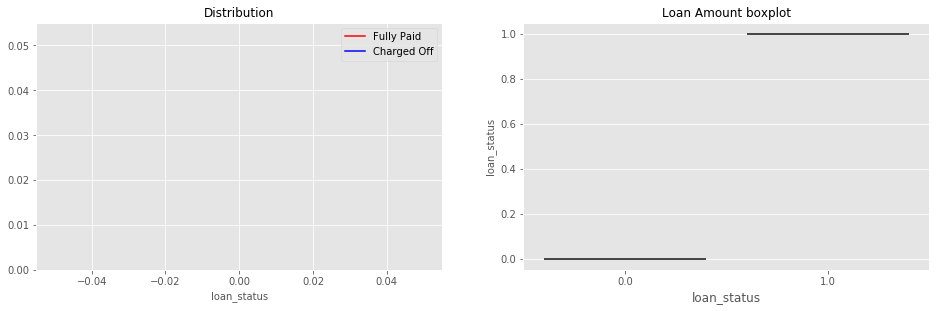

mort_acc


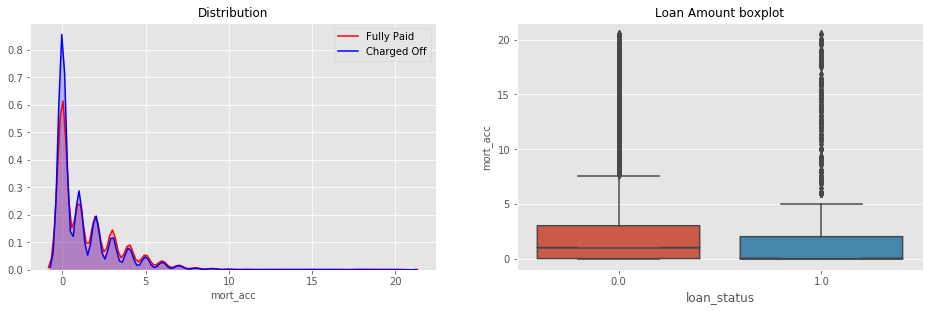

num_accts_ever_120_pd


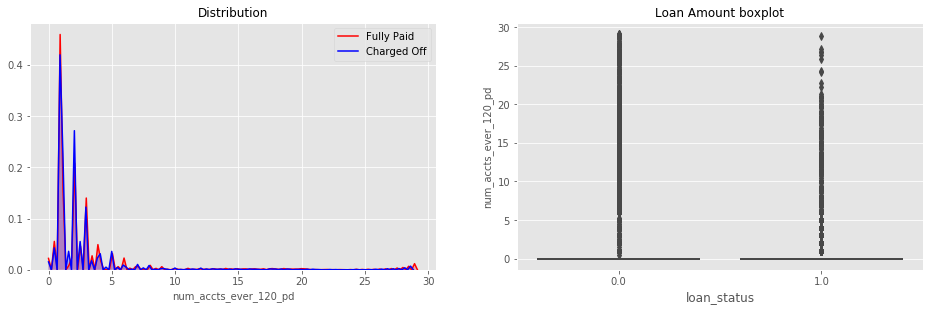

num_bc_sats


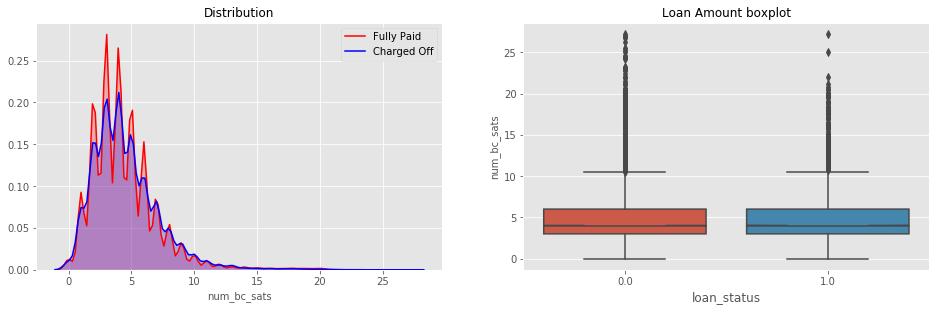

num_bc_tl


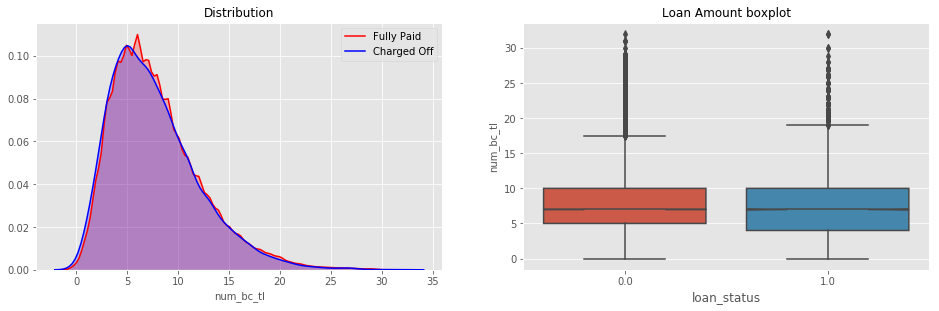

num_il_tl


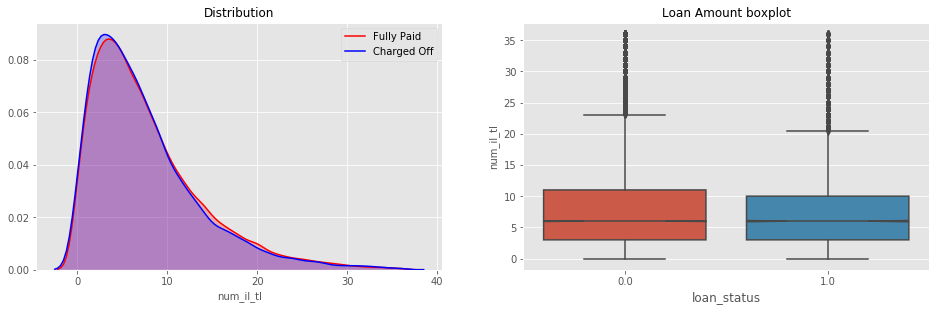

num_op_rev_tl


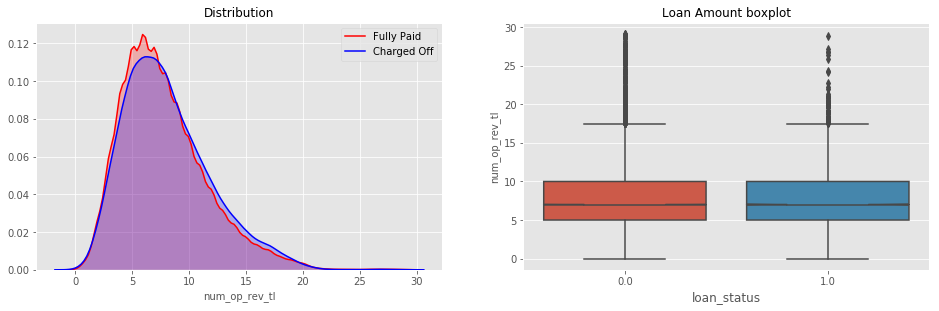

num_rev_accts


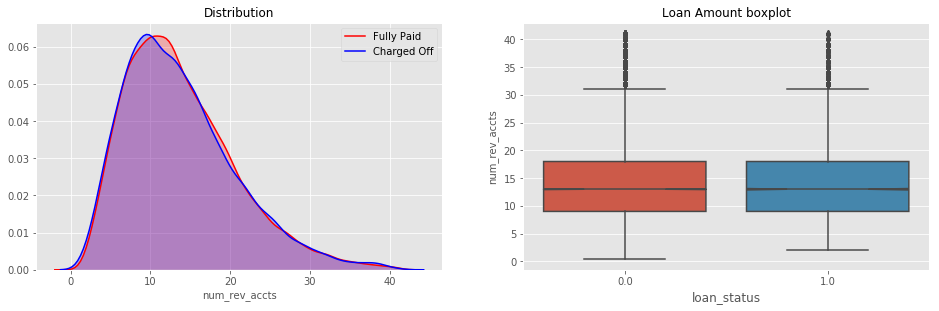

num_rev_tl_bal_gt_0


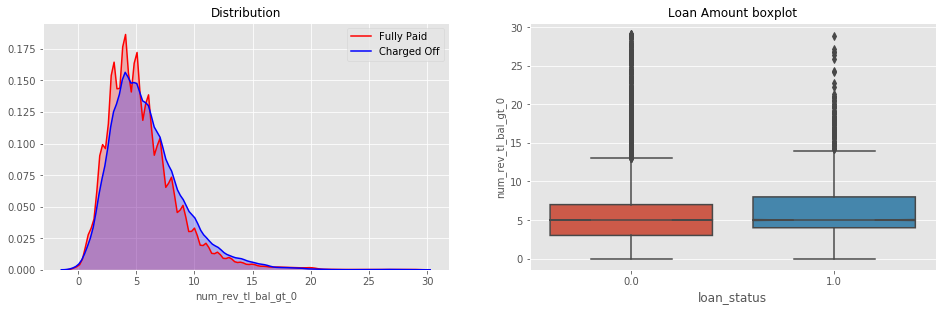

num_sats


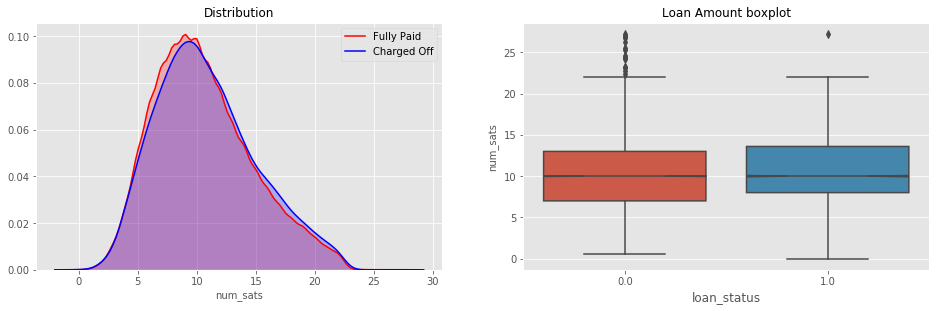

open_acc


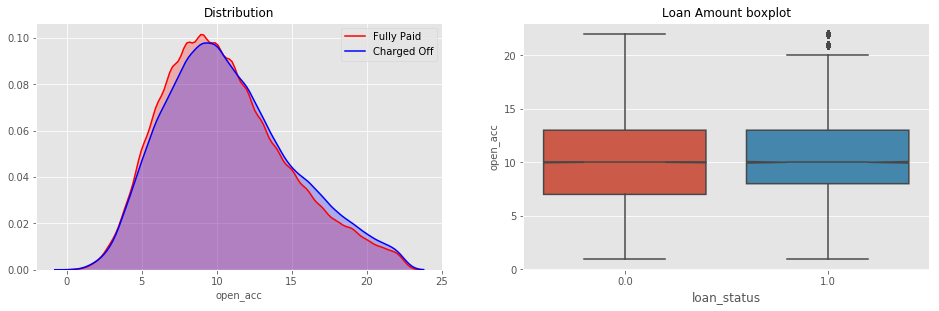

pct_tl_nvr_dlq


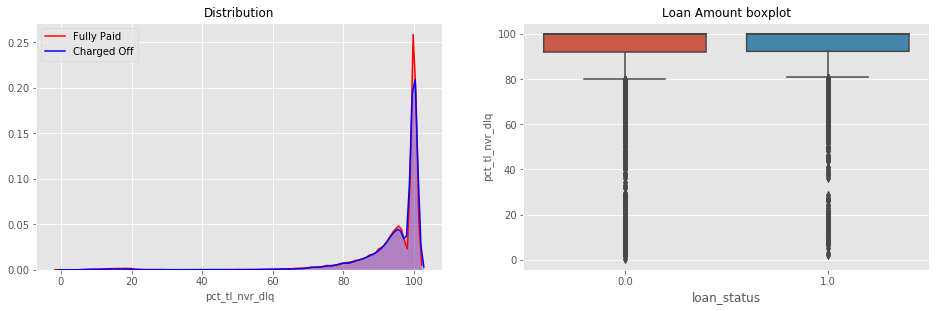

percent_bc_gt_75


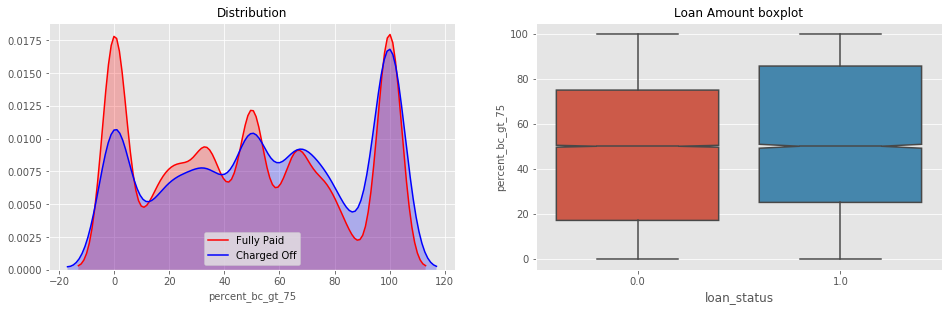

pub_rec


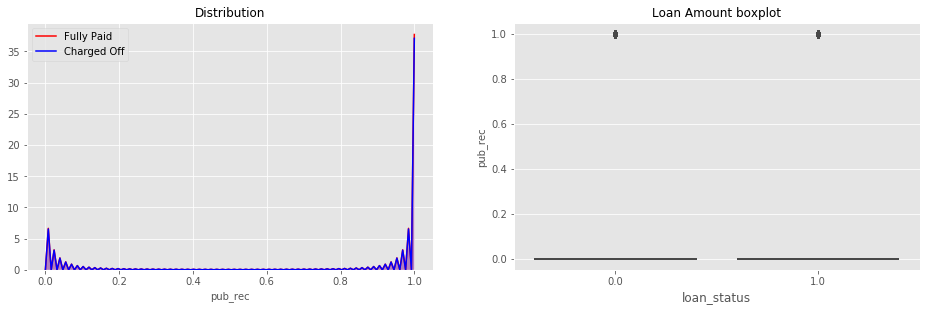

pub_rec_bankruptcies


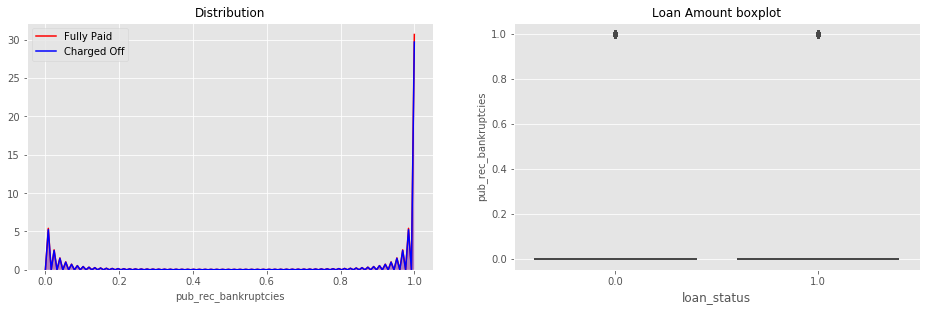

revol_bal


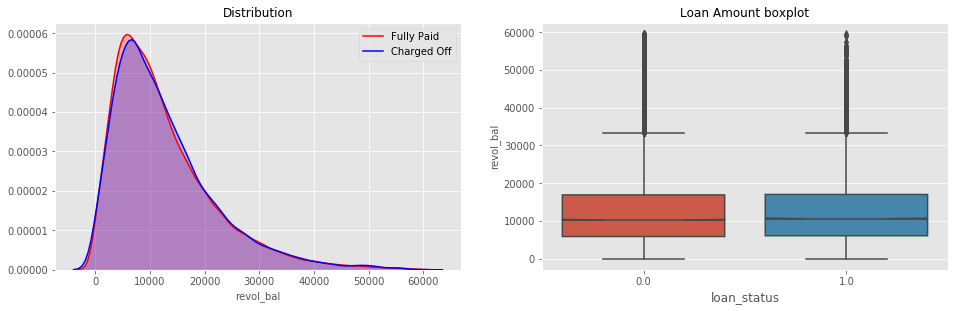

revol_util


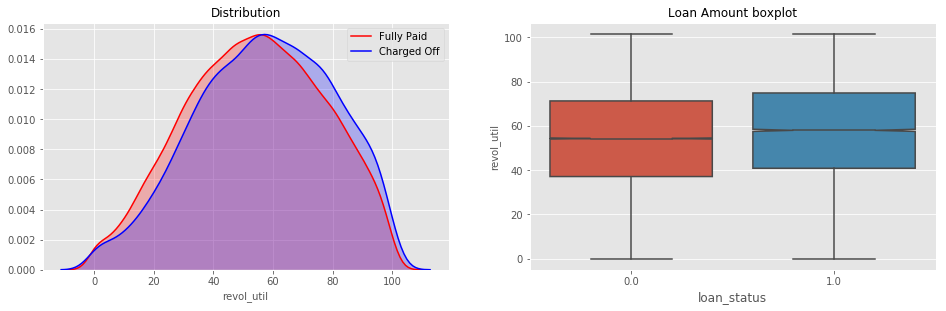

tax_liens


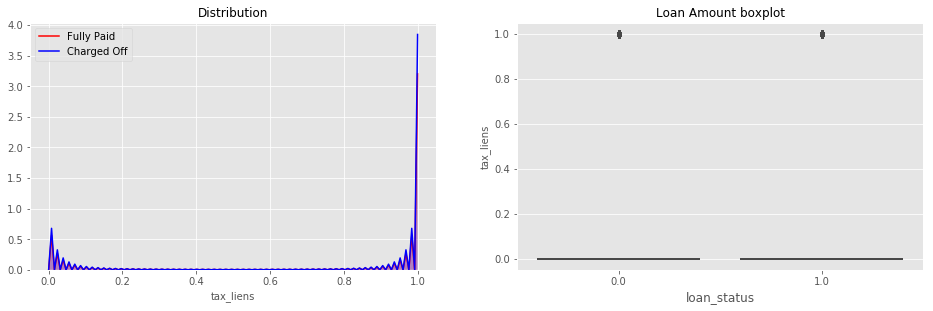

tot_coll_amt


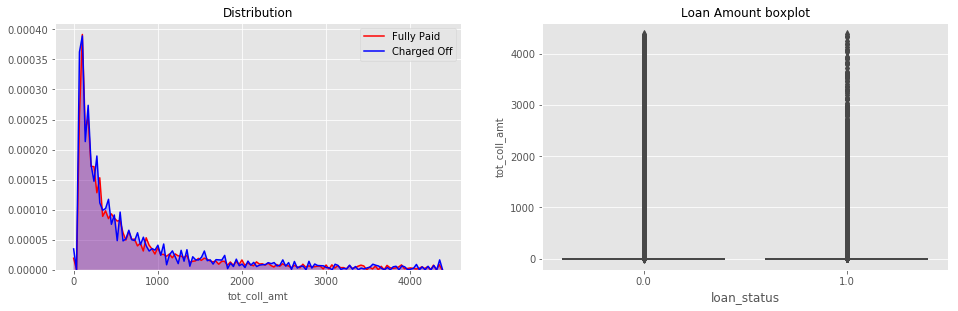

tot_hi_cred_lim


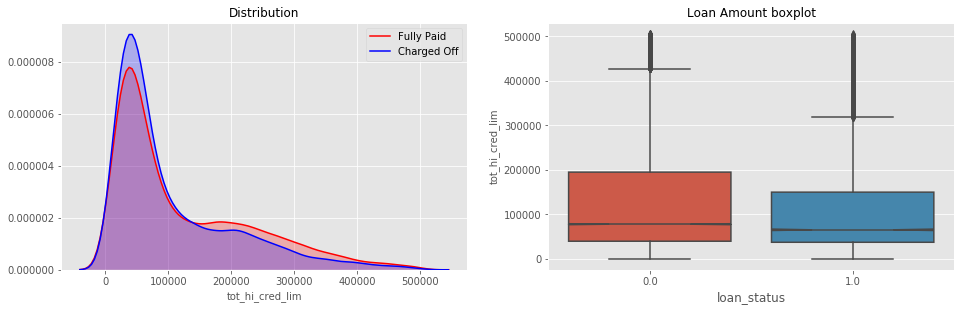

total_bal_ex_mort


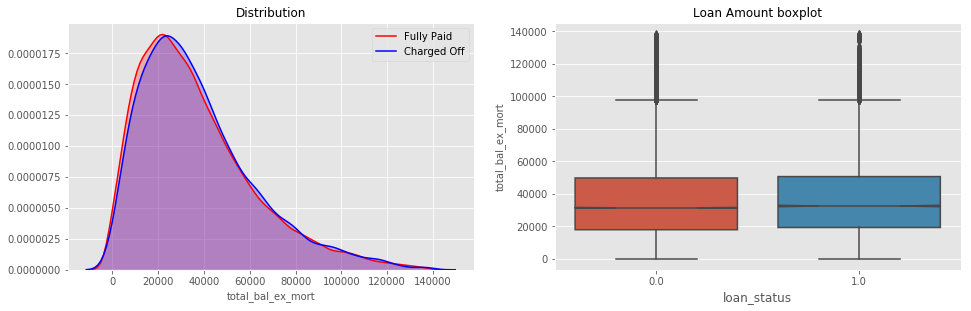

total_bc_limit


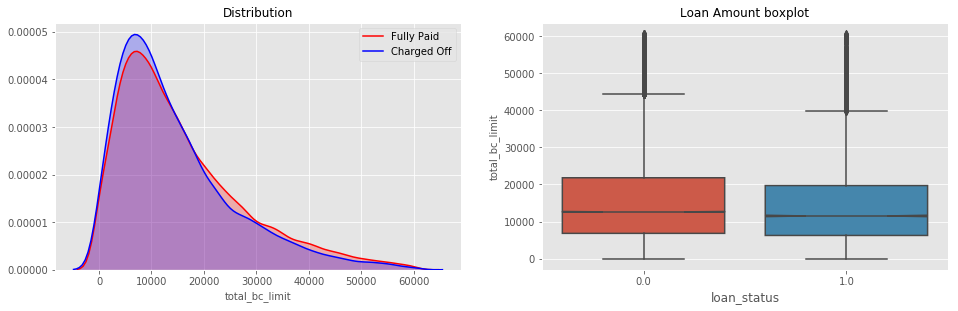

total_il_high_credit_limit


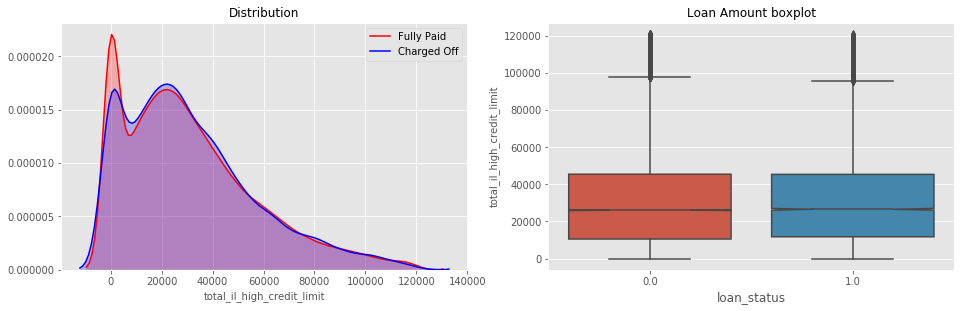

In [40]:
for variable in numeric_variables:
    print(variable)
    numerical_variables_by_target_plot(variable)

#### 03.3 Categorical Features

### 02 - Numeric Variables

In [11]:
loans.dtypes

funded_amnt_inv       float64
term                   object
issue_d                object
installment           float64
int_rate               object
grade                  object
emp_title              object
emp_length             object
annual_inc            float64
title                  object
dti                   float64
home_ownership         object
zip_code               object
addr_state             object
total_rec_late_fee    float64
application_type       object
total_acc             float64
loan_status             int64
dtype: object

In [12]:
numerical_variables = ["funded_amnt_inv", "installment", "int_rate", "annual_inc", "dti",
                        "total_rec_late_fee", "total_acc"]

In [13]:
loans[numerical_variables].isnull().sum()

funded_amnt_inv        0
installment            0
int_rate               0
annual_inc             4
dti                   53
total_rec_late_fee     0
total_acc             29
dtype: int64

__Interest Rate__

In [14]:
loans['int_rate']

0           19.53%
1           20.75%
5           10.75%
6           11.99%
10          13.67%
13           5.32%
19           9.75%
20          11.47%
22           9.75%
25          12.99%
27           7.39%
28          18.99%
31          15.31%
35          19.53%
37          18.25%
42          14.46%
43           9.16%
44          13.67%
48          14.46%
57          12.99%
58          14.46%
59           5.32%
62           6.49%
63          19.53%
64           9.75%
66           7.89%
71           8.39%
72          14.46%
78           5.32%
79           5.32%
            ...   
1765393     10.49%
1765394     15.99%
1765395     13.66%
1765396      6.99%
1765397     15.99%
1765398      8.19%
1765399     11.99%
1765402     17.86%
1765403     17.86%
1765404      8.19%
1765405     15.59%
1765406     15.99%
1765408      8.19%
1765409      6.03%
1765410      6.03%
1765411      6.49%
1765412     14.99%
1765413     16.49%
1765414     14.31%
1765415      9.49%
1765416      8.67%
1765417     

In [15]:
loans['int_rate'] = loans['int_rate'].map(lambda x: float(x[:-1]))

In [16]:
loans['int_rate'].head()

0     19.53
1     20.75
5     10.75
6     11.99
10    13.67
Name: int_rate, dtype: float64

In [17]:
loans.dtypes

funded_amnt_inv       float64
term                   object
issue_d                object
installment           float64
int_rate              float64
grade                  object
emp_title              object
emp_length             object
annual_inc            float64
title                  object
dti                   float64
home_ownership         object
zip_code               object
addr_state             object
total_rec_late_fee    float64
application_type       object
total_acc             float64
loan_status             int64
dtype: object

__Outliers__

In [18]:
loans[numerical_variables].describe()

,funded_amnt_inv,installment,int_rate,annual_inc,dti,total_rec_late_fee,total_acc
count,883695.000000,883695.000000,883695.000000,8.836910e+05,883642.000000,8.836950e+05,883666.000000
mean,14258.361060,436.443223,13.457068,7.535964e+04,17.921756,1.129890e+00,25.369467
std,8532.472866,256.615587,4.641531,6.513331e+04,9.100154,7.731221e+00,11.987691
min,0.000000,4.930000,5.320000,0.000000e+00,-1.000000,-5.100000e-09,1.000000
25%,7925.000000,250.330000,9.990000,4.500000e+04,11.670000,0.000000e+00,17.000000
50%,12000.000000,376.250000,12.990000,6.500000e+04,17.400000,0.000000e+00,24.000000
75%,20000.000000,576.270000,16.290000,9.000000e+04,23.690000,0.000000e+00,32.000000
max,40000.000000,1714.540000,30.990000,9.550000e+06,999.000000,6.543200e+02,176.000000


In [19]:
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than n outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

In [20]:
# detect outliers from numerical features 
outliers_to_drop = detect_outliers(loans,1,numerical_variables)

print("There are {} outliers from numerical features".format(len(outliers_to_drop)))

There are 4062 outliers from numerical features


In [21]:
loans = loans.drop(outliers_to_drop, axis=0)

In [22]:
loans.shape

(879633, 18)

In [23]:
loans[numerical_variables].describe()

,funded_amnt_inv,installment,int_rate,annual_inc,dti,total_rec_late_fee,total_acc
count,879633.000000,879633.000000,879633.000000,8.796290e+05,879581.000000,8.796330e+05,879604.000000
mean,14171.467904,433.270098,13.427911,7.509574e+04,17.917728,9.813336e-01,25.353935
std,8438.078920,252.202513,4.601170,6.476573e+04,9.076448,6.721550e+00,11.980763
min,0.000000,4.930000,5.320000,0.000000e+00,-1.000000,-5.100000e-09,1.000000
25%,7850.000000,250.230000,9.990000,4.500000e+04,11.660000,0.000000e+00,17.000000
50%,12000.000000,375.430000,12.990000,6.500000e+04,17.390000,0.000000e+00,24.000000
75%,20000.000000,572.720000,16.290000,9.000000e+04,23.680000,0.000000e+00,32.000000
max,40000.000000,1506.650000,30.990000,9.550000e+06,999.000000,4.020300e+02,176.000000


__Dealing NA's__

In [24]:
loans[numerical_variables].isnull().sum()

funded_amnt_inv        0
installment            0
int_rate               0
annual_inc             4
dti                   52
total_rec_late_fee     0
total_acc             29
dtype: int64

In [25]:
loans[numerical_variables].median()

funded_amnt_inv       12000.00
installment             375.43
int_rate                 12.99
annual_inc            65000.00
dti                      17.39
total_rec_late_fee        0.00
total_acc                24.00
dtype: float64

In [26]:
loans[numerical_variables] = loans[numerical_variables].fillna(loans[numerical_variables].median())

In [27]:
loans[numerical_variables].isnull().sum()

funded_amnt_inv       0
installment           0
int_rate              0
annual_inc            0
dti                   0
total_rec_late_fee    0
total_acc             0
dtype: int64

### 03 - Categorical Variables

In [28]:
categorical_variables = ['term', 'grade', 'emp_title', 'emp_length', 'title', 
                         'home_ownership', 'zip_code', 'addr_state', 'application_type']

In [29]:
for variable in categorical_variables:
    number_of_categories = loans[variable].unique().size
    print("{}: {} categories".format(variable, number_of_categories))

term: 2 categories
grade: 7 categories
emp_title: 294604 categories
emp_length: 12 categories
title: 61934 categories
home_ownership: 6 categories
zip_code: 933 categories
addr_state: 51 categories
application_type: 2 categories


Too many categories for `emp_title`, `title`, `zip_code` and `addr_state`. Let's take a look at these three variables:

__Employee Title__:

In [30]:
loans['emp_title'].value_counts().head(10)

Teacher             12508
Manager             11524
Registered Nurse     5301
RN                   5155
Owner                5080
Supervisor           5059
Sales                4500
Driver               4196
Project Manager      3945
Office Manager       3288
Name: emp_title, dtype: int64

NA's

In [31]:
loans['emp_title'].isnull().sum()

52740

In [32]:
loans['emp_title'] = loans['emp_title'].fillna(method="ffill")

In [33]:
loans['emp_title'].isnull().sum()

0

In [34]:
loans['emp_title'] = loans['emp_title'].str.lower()

In [35]:
loans['emp_title'][loans['emp_title'].str.contains('manager')] = 'manager'

In [36]:
loans['manager'] = (loans['emp_title'] == 'manager').astype(int)

In [37]:
loans = loans.drop('emp_title', axis=1)

In [38]:
loans['manager'].describe()

count    879633.000000
mean          0.129146
std           0.335362
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: manager, dtype: float64

__Purpose__ of the loan:

In [39]:
loans['title'].value_counts().head(20)

Debt consolidation           406459
Credit card refinancing      147109
Home improvement              42972
Other                         36991
Debt Consolidation            15213
Major purchase                13582
Medical expenses               7648
Business                       7092
Car financing                  6371
Consolidation                  5158
Moving and relocation          4680
debt consolidation             4648
Vacation                       4596
Debt Consolidation Loan        3731
Home buying                    3044
Credit Card Consolidation      2291
consolidation                  2096
Personal Loan                  2092
Home Improvement               1721
Consolidation Loan             1713
Name: title, dtype: int64

In [40]:
loans['title'].isnull().sum()

8869

In [41]:
loans['title'] = loans['title'].fillna(method="ffill")

In [42]:
loans['title'].isnull().sum()

0

In [43]:
def loan_purpose_renaming():    
    title = loans['title'].str.lower()
    title[title.str.contains("credit card|credit")] = "credit card refinancing"
    title[title.str.contains("debt|consolidation|consolidate|refinance")] = "debt consolidation"
    title[title.str.contains("home improvement")] = "home improvement"
    title[title.str.contains("^home$|home loan")] = "home buying"
    title[title.str.contains("green")] = "green"
    title[title.str.contains("wedding")] = "wedding"
    title[title.str.contains("medical")] = "medical"
    title[title.str.contains("personal|my loan|^loan$|lending club")] = "personal"
    title[title.str.contains("business")] = "business"
    title[title.str.contains("pay(| )off")] = "payoff"
    title[title.str.contains("car loan|car financing")] = "car"
    
    return title

In [44]:
loans['title'] = loan_purpose_renaming()

In [45]:
loans['title'].value_counts()

debt consolidation                        482875
credit card refinancing                   179675
home improvement                           47978
other                                      37664
major purchase                             14081
personal                                   10188
business                                    9494
medical                                     9079
car                                         7299
payoff                                      6546
vacation                                    4861
moving and relocation                       4753
home buying                                 3880
wedding                                     2337
freedom                                     1227
green                                        536
bills                                        459
loan 1                                       347
cc loan                                      306
pool                                         293
pool loan           

In [46]:
loans['refinance'] = ((loans['title'] == 'credit card refinancing') | \
                     (loans['title'] == 'debt consolidation')).astype(int)

In [47]:
loans = loans.drop('title', axis = 1)

In [48]:
loans['refinance'].describe()

count    879633.000000
mean          0.753212
std           0.431143
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: refinance, dtype: float64

__zip_code__:

In [49]:
loans['zip_code'].describe()

count     879633
unique       933
top        945xx
freq       10179
Name: zip_code, dtype: object

In [50]:
loans['zip_code'].value_counts().head()

945xx    10179
750xx     9540
112xx     9030
606xx     8165
300xx     7811
Name: zip_code, dtype: int64

In [51]:
loans = loans.drop('zip_code', axis=1)

__addr_state__:

In [52]:
loans['addr_state'].describe()

count     879633
unique        51
top           CA
freq      133038
Name: addr_state, dtype: object

In [53]:
loans['addr_state'].value_counts().head()

CA    133038
NY     71929
TX     70740
FL     61854
IL     33406
Name: addr_state, dtype: int64

In [54]:
loans = loans.drop('addr_state', axis = 1)

In [55]:
categorical_variables = ['term', 'grade', 'emp_length', 'home_ownership', 'application_type']

In [56]:
loans[categorical_variables].describe()

,term,grade,emp_length,home_ownership,application_type
count,879633,879633,833358,879633,879633
unique,2,7,11,6,2
top,36 months,B,10+ years,MORTGAGE,Individual
freq,668168,253784,285774,437718,874543


__issue_d__

We have just one date variable, `issue_d`. We are only interested in the year of the loan and we will consider it as categorical variable:

In [57]:
loans['issue_d'] = loans['issue_d'].map(lambda x: x[4:])

In [58]:
loans['issue_d'].describe()

count     879633
unique        11
top         2015
freq      245033
Name: issue_d, dtype: object

In [59]:
loans = loans.drop('issue_d', axis = 1)

In [60]:
loans.head()

,funded_amnt_inv,term,installment,int_rate,grade,emp_length,annual_inc,dti,home_ownership,total_rec_late_fee,application_type,total_acc,loan_status,manager,refinance
0,10000.0,60 months,262.34,19.53,D,4 years,52000.0,15.00,OWN,0.0,Individual,12.0,0,0,0
1,35000.0,60 months,941.96,20.75,E,3 years,85000.0,24.98,MORTGAGE,0.0,Individual,19.0,0,0,1
5,14400.0,36 months,469.74,10.75,B,10+ years,85000.0,28.11,MORTGAGE,0.0,Individual,33.0,0,0,0
6,18000.0,60 months,400.31,11.99,C,6 years,100000.0,20.41,MORTGAGE,0.0,Individual,40.0,0,0,1
10,7250.0,36 months,246.63,13.67,C,3 years,72000.0,23.93,MORTGAGE,0.0,Individual,24.0,0,0,1


In [61]:
loans.shape

(879633, 15)

In [62]:
loans.isnull().sum()

funded_amnt_inv           0
term                      0
installment               0
int_rate                  0
grade                     0
emp_length            46275
annual_inc                0
dti                       0
home_ownership            0
total_rec_late_fee        0
application_type          0
total_acc                 0
loan_status               0
manager                   0
refinance                 0
dtype: int64

In [63]:
loans = loans.fillna(method = 'ffill')

In [64]:
loans.isnull().sum()

funded_amnt_inv       0
term                  0
installment           0
int_rate              0
grade                 0
emp_length            0
annual_inc            0
dti                   0
home_ownership        0
total_rec_late_fee    0
application_type      0
total_acc             0
loan_status           0
manager               0
refinance             0
dtype: int64

In [65]:
loans = pd.get_dummies(loans, columns = categorical_variables)

### 04 - Final Data 

In [66]:
loans.head()

,funded_amnt_inv,installment,int_rate,annual_inc,dti,total_rec_late_fee,total_acc,loan_status,manager,refinance,...,emp_length_9 years,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_Individual,application_type_Joint App
0,10000.0,262.34,19.53,52000.0,15.00,0.0,12.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,35000.0,941.96,20.75,85000.0,24.98,0.0,19.0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
5,14400.0,469.74,10.75,85000.0,28.11,0.0,33.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
6,18000.0,400.31,11.99,100000.0,20.41,0.0,40.0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
10,7250.0,246.63,13.67,72000.0,23.93,0.0,24.0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [67]:
loans['non_payment'] = loans['loan_status']

In [68]:
loans = loans.drop('loan_status', axis = 1)

In [69]:
loans.head()

,funded_amnt_inv,installment,int_rate,annual_inc,dti,total_rec_late_fee,total_acc,manager,refinance,term_ 36 months,...,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_Individual,application_type_Joint App,non_payment
0,10000.0,262.34,19.53,52000.0,15.00,0.0,12.0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,35000.0,941.96,20.75,85000.0,24.98,0.0,19.0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
5,14400.0,469.74,10.75,85000.0,28.11,0.0,33.0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
6,18000.0,400.31,11.99,100000.0,20.41,0.0,40.0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
10,7250.0,246.63,13.67,72000.0,23.93,0.0,24.0,0,1,1,...,0,0,1,0,0,0,0,1,0,0


In [70]:
loans.shape

(879633, 38)

In [71]:
loans.dtypes

funded_amnt_inv                float64
installment                    float64
int_rate                       float64
annual_inc                     float64
dti                            float64
total_rec_late_fee             float64
total_acc                      float64
manager                          int64
refinance                        int64
term_ 36 months                  uint8
term_ 60 months                  uint8
grade_A                          uint8
grade_B                          uint8
grade_C                          uint8
grade_D                          uint8
grade_E                          uint8
grade_F                          uint8
grade_G                          uint8
emp_length_1 year                uint8
emp_length_10+ years             uint8
emp_length_2 years               uint8
emp_length_3 years               uint8
emp_length_4 years               uint8
emp_length_5 years               uint8
emp_length_6 years               uint8
emp_length_7 years       

In [72]:
loans.describe()

,funded_amnt_inv,installment,int_rate,annual_inc,dti,total_rec_late_fee,total_acc,manager,refinance,term_ 36 months,...,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_Individual,application_type_Joint App,non_payment
count,879633.000000,879633.000000,879633.000000,8.796330e+05,879633.000000,8.796330e+05,879633.000000,879633.000000,879633.000000,879633.000000,...,879633.000000,879633.000000,879633.000000,879633.000000,879633.000000,879633.000000,879633.000000,879633.000000,879633.000000,879633.000000
mean,14171.467904,433.270098,13.427911,7.509570e+04,17.917697,9.813336e-01,25.353891,0.129146,0.753212,0.759599,...,0.083960,0.000126,0.497614,0.000058,0.000207,0.102174,0.399820,0.994213,0.005787,0.205928
std,8438.078920,252.202513,4.601170,6.476558e+04,9.076180,6.721550e+00,11.980568,0.335362,0.431143,0.427327,...,0.277328,0.011233,0.499995,0.007614,0.014383,0.302878,0.489861,0.075849,0.075849,0.404378
min,0.000000,4.930000,5.320000,0.000000e+00,-1.000000,-5.100000e-09,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7850.000000,250.230000,9.990000,4.500000e+04,11.670000,0.000000e+00,17.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,12000.000000,375.430000,12.990000,6.500000e+04,17.390000,0.000000e+00,24.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,20000.000000,572.720000,16.290000,9.000000e+04,23.680000,0.000000e+00,32.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,40000.000000,1506.650000,30.990000,9.550000e+06,999.000000,4.020300e+02,176.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
loans.to_csv('../data/loans_sample_processed.csv', sep = "^", index = False)